In [8]:
## initialize the required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import random
import math
import itertools    
from numpy import random
import pandas as pd
import numpy.matlib

# import plotly.graph_objects as go

from matplotlib import rc

font = {'family' : 'serif',
    'serif': 'sans',
    'weight' : 'bold',
    'size'   : 10}

plt.rc('font', **font)
plt.rc('text', usetex=True)

from matplotlib.colors import LinearSegmentedColormap

cdict1 = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 1.0),
                   (0.5, 0.1, 0.0),
                   (1.0, 0.0, 0.0))
         }

cmap = LinearSegmentedColormap.from_list('mycmap', ['#ffffff', '#CCFF00', '#C5C7C4'])

### Fig 1. (A skew tent map)

<IPython.core.display.Javascript object>


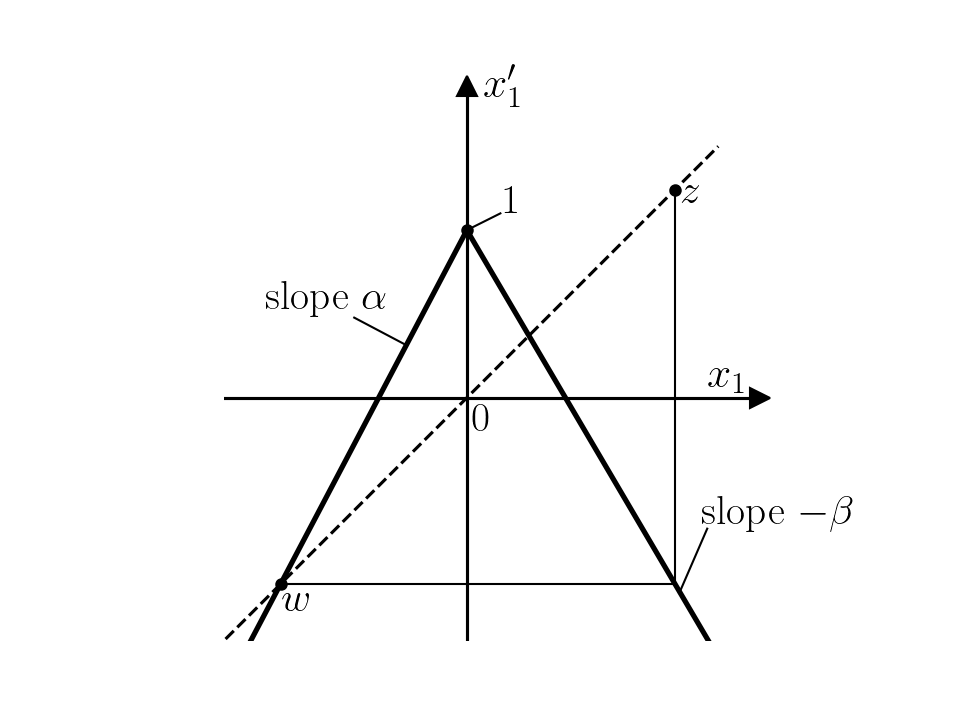

In [6]:
%matplotlib notebook


alpha=1.9
beta=1.7

sz=20


X = np.array([-1/(-beta-1), 0])

X1 = np.linspace(-3.5, 1.5, 300)
def h(x):
    if x<=0:
        return (alpha)*x + 1
    else:
        return (-beta)*x + 1
    
H1 = []
for x in X1:
    H1 += [h(x), ]
    
plt.plot(X1, H1, 'k-', lw=2.5)
plt.plot(X1, X1, 'k--')

ax = plt.subplot(111)

Y1=[]
for i in X1:
    Y1+=[h(i), ]
plt.plot(X1, Y1, 'k-')

x0 = 0
p=[[x0, 0]]
for steps in range(2):
    p+=[[x0, h(x0)], ]
    p+=[[h(x0), h(x0)], ]
    x0 = h(x0)    
p+=[[x0, h(x0)], ]

    
x0 = 0
p1 = [h(x0), h(x0)]
p1a = [x0, h(x0)]

x0 = h(x0)
p2 = [h(x0), h(x0)]
p2a = [x0, h(x0)]

x0 = h(x0)
p3a = [x0, h(x0)]

q = np.array(p).T
   
w = 1/(1-alpha)
plt.plot([w], [w],'ko', ms=5)
zz = alpha/((alpha - 1)*beta)
plt.plot([zz], [zz],'ko', ms=5)

plt.plot([zz, zz], [zz, w], 'k-', lw=1)
plt.plot([zz, w], [w, w], 'k-', lw=1)


plt.text(1.44, 0.07, "$x_1$", size=21)
plt.text(0.1, 1.8, "$x_1'$", size=21)


plt.xlim(-1.45, )
plt.ylim(-1.45,)

plt.plot([0], [1], 'ko', ms=5)
plt.text(1.28, 1.16, '$z$', size=sz)
plt.plot([-0.371, -0.672], [0.319, 0.478], 'k-', lw=1)
plt.text(-1.2, 0.53, 'slope $\\alpha$', size=sz)
plt.plot([1.267, 1.434], [-1.166, -0.781], 'k-', lw=1)
plt.text(1.4, -0.75, 'slope $-\\beta$', size=sz)
plt.plot([0, 0.2], [1, 1.1], 'k-', lw=1)
plt.text(0.22, 1.1, '$1$', size=sz)
plt.text(0.03, -0.2, '$0$', size=sz)
plt.text(-1.1, -1.27, '$w$', size=sz)

plt.axis('off')

ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
ax.axhline(y=0, color='k', linestyle='-')
ax.axvline(x=0, color='k', linestyle='-')
ax.set_aspect('equal')

### Fig 2.

<IPython.core.display.Javascript object>


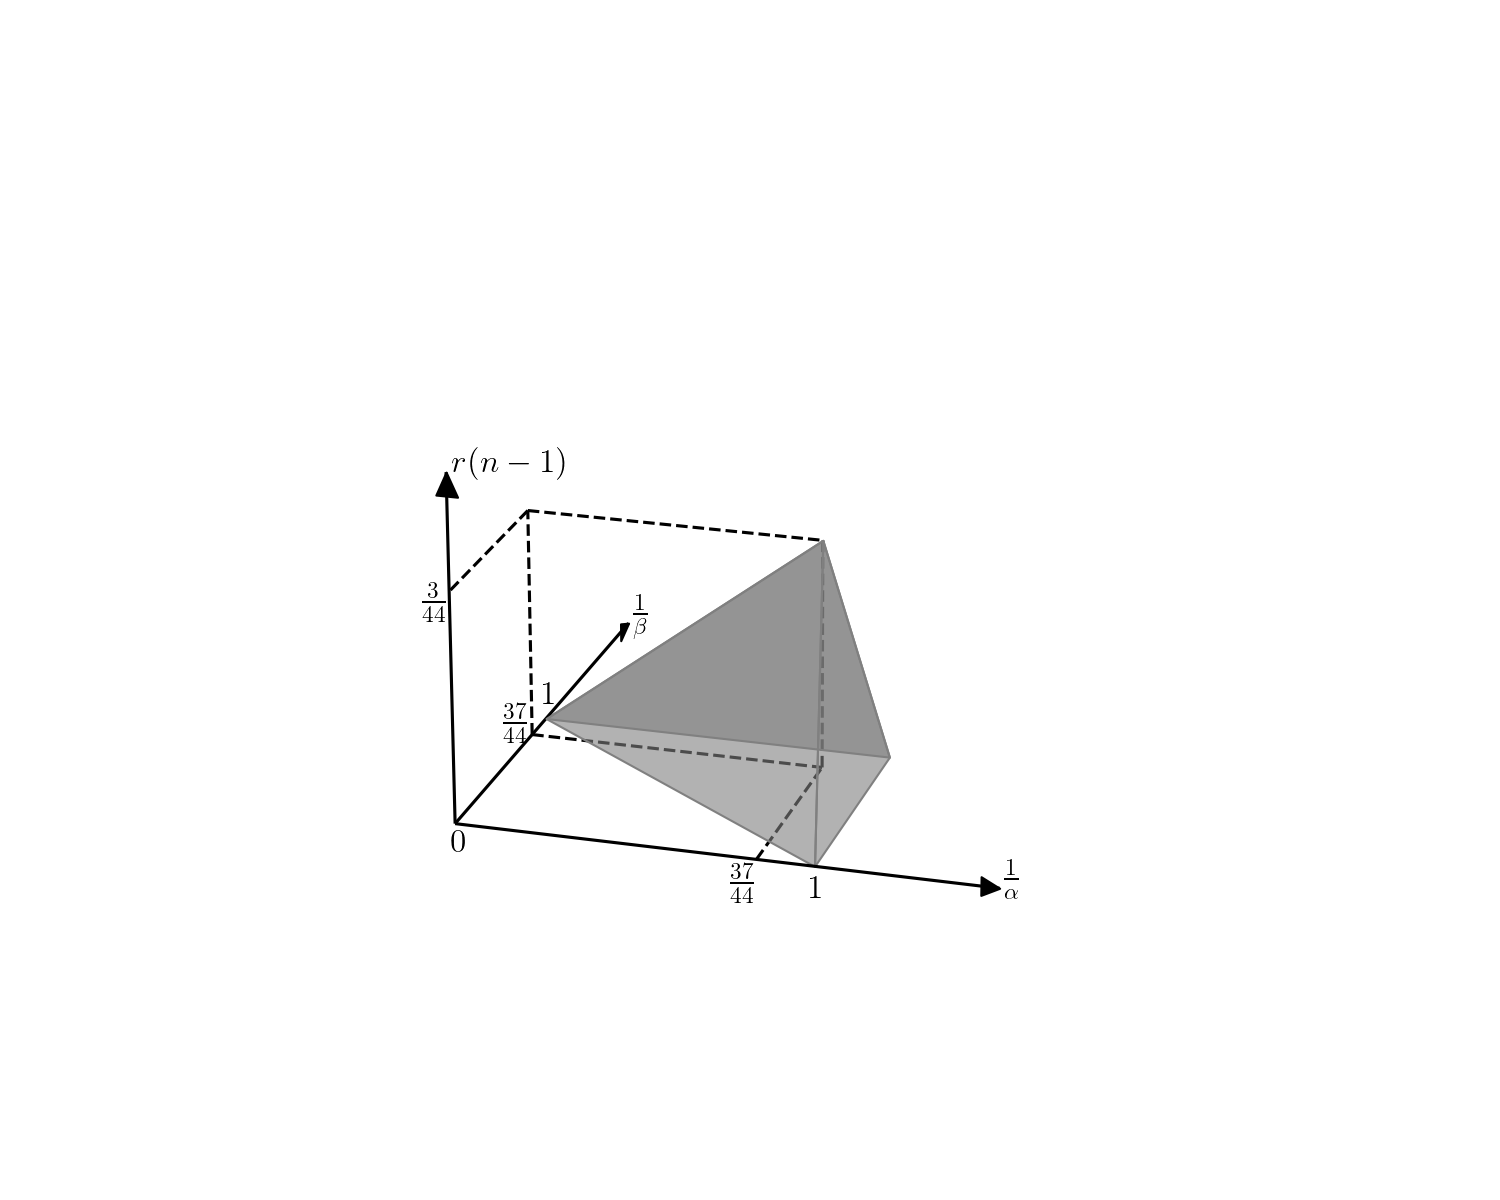

In [7]:
sz=16
%matplotlib notebook

def draw_arrow(ax, start, end, color, label):
    ax.quiver(start[0], start[1], start[2],
              end[0]-start[0], end[1]-start[1], end[2]-start[2],
              color=color, arrow_length_ratio=0.)
    ax.text(end[0]+0.01, end[1]+0.01, end[2], label, color=color, size=sz)

fig = plt.figure(figsize=(10, 8))
plt.tight_layout()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-0.1, 1.5])
ax.set_ylim([-0.1, 2])
ax.set_zlim([-0.1, 1.5])

draw_arrow(ax, [0, 0, 0], [1.5, 0, 0], 'k', '$\\frac{1}{\\alpha}$')
draw_arrow(ax, [0, 0, 0], [0, 2, 0], 'k', '$\\frac{1}{\\beta}$')
draw_arrow(ax, [0, 0, 0], [0, 0, 1.5], 'k', '$r(n - 1)$')

r_star = np.array([37/44, 37/44, 1])


verts=np.array([[1, 0, 0],[0, 1, 0], [37/44, 37/44, 1]])
faces = [[verts[0], verts[1], verts[2]]]
ax.add_collection3d(Poly3DCollection(faces, color='grey', alpha = 0.6))

verts=np.array([[0, 1, 0],[1, 1, 0], [37/44, 37/44, 1]])
faces = [[verts[0], verts[1], verts[2]]]
ax.add_collection3d(Poly3DCollection(faces, color='grey', alpha = 0.6))

verts=np.array([[1, 0, 0],[1, 1, 0], [37/44, 37/44, 1]])
faces = [[verts[0], verts[1], verts[2]]]
ax.add_collection3d(Poly3DCollection(faces, color='grey', alpha = 0.6))

# arrows
verts=np.array([[0, 0, 1.5], [0.03, 0, 1.4],[-0.03, 0, 1.4]])
faces = [[verts[0], verts[1], verts[2]]]
ax.add_collection3d(Poly3DCollection(faces, color='k'))

verts=np.array([[0, 2, 0], [0., 1.9, 0.04],[0, 1.9, -0.04]])
faces = [[verts[0], verts[1], verts[2]]]
ax.add_collection3d(Poly3DCollection(faces, color='k'))

verts=np.array([[1.5, 0, 0], [1.45, 0, 0.04],[1.45, 0, -0.04]])
faces = [[verts[0], verts[1], verts[2]]]
ax.add_collection3d(Poly3DCollection(faces, color='k'))

ax.text(-0.01, -0.01, -.12, '$0$', size=sz)
# plt.plot([2.5], [0], [0], ms='>', size=sz)

plt.plot([37/44, 37/44], [0, 37/44], [0, 0], 'k--')
plt.plot([0, 37/44], [37/44, 37/44], [0, 0], 'k--')

plt.plot([37/44, 37/44], [37/44, 37/44], [0, 1], 'k--')
plt.plot([0, 0], [37/44, 37/44], [0, 1], 'k--')
plt.plot([0, 37/44], [37/44, 37/44], [1, 1], 'k--')
plt.plot([0, 0], [37/44, 0], [1, 1], 'k--')

ax.text(0.78, -0.0576, -0.12, '$\\frac{37}{44}$', size=sz)
ax.text(1., -0.0576, -0.11, '$1$', size=sz)
ax.text(-0.13, 1., -0.08, '$\\frac{37}{44}$', size=sz)
ax.text(0.01, 0.931, 0.1, '$1$', size=sz)
ax.text(-0.08, 0.01, 0.9, '$\\frac{3}{44}$', size=sz)
# [0, 37/44, 1], [0, 0, 1]

ax.axis('off')
ax.set_box_aspect([1,1,2/3])

ax.view_init(elev=20, azim=5)


### Fig. 3. (Code to create the datafile "pp_3D.csv")

In [26]:
alpha = 1.4
beta = 1.45
n=3

r = min(3*(1-1/alpha)/(7*(n-1)), 3*(1-1/beta)/(7*(n-1)), (1/alpha+1/beta-1)/(10*(n-1)))
r

0.020197044334975378

In [27]:
k=np.arange(n-1)
print("k=", k)
EIG = np.exp(2*k*1j*np.pi/(n-1))*r
Eig = np.append(alpha, EIG)
print("EIGL =", Eig)

a1L = -sum(Eig)

a2L=0
for i in range(n-1):
    for j in range(i+1, n):
        a2L += Eig[i]*Eig[j]
        
a3L = (-1)**3*np.prod(Eig)


k=np.arange(n-1)
EIG = np.exp(2*(k+1/2)*1j*np.pi/(n-1))*r


Eig = np.append(-beta, EIG)
print("EIGR =", Eig)

a1R = -sum(Eig)

a2R=0
for i in range(n-1):
    for j in range(i+1, n):
        a2R += Eig[i]*Eig[j]

a3R = (-1)**3*np.prod(Eig)

k= [0 1]
EIGL = [ 1.4       +0.00000000e+00j  0.02019704+0.00000000e+00j
 -0.02019704+2.47342457e-18j]
EIGR = [-1.45000000e+00+0.j          1.23671228e-18+0.02019704j
 -3.71013685e-18-0.02019704j]


In [28]:
a1L = -alpha
a2L = -0.0004
a3L = 0.00056

a1R = beta
a2R = 0.0004
a3R = 0.00058
AL = np.array([[-a1L, 1, 0], [-a2L, 0, 1], [-a3L, 0, 0]])
AR = np.array([[-a1R, 1, 0], [-a2R, 0, 1], [-a3R, 0, 0]])
b = np.array([1, 0, 0])


AL = AL.real
AR = AR.real
print("AL=", AL)
print(" ")
print("AR=", AR)
print(" ")

Eig_AL = np.linalg.eig(AL)
Eig_AR = np.linalg.eig(AR)
Y_star = np.dot(np.linalg.inv(np.eye(n)-AL), b)

X_star = np.dot(np.linalg.inv(np.eye(n)-AR), b)
print(" ")
print("X_star=", X_star)
print("Y_star=", Y_star)
print(" ")
X_star, Y_star
init = X_star+np.random.randn(n)

X=[init]
for i in range(3000):
    if init[0]<=0:
        X_temp = AL.dot(init)+b
    else:
        X_temp = AR.dot(init)+b
    X+=[X_temp, ]
    init=X_temp


X=np.array(X).T
print(X)

AL= [[ 1.4e+00  1.0e+00  0.0e+00]
 [ 4.0e-04  0.0e+00  1.0e+00]
 [-5.6e-04  0.0e+00  0.0e+00]]
 
AR= [[-1.45e+00  1.00e+00  0.00e+00]
 [-4.00e-04  0.00e+00  1.00e+00]
 [-5.80e-04  0.00e+00  0.00e+00]]
 
 
X_star= [ 4.08000065e-01 -3.99840064e-04 -2.36640038e-04]
Y_star= [-2.50100040e+00  4.00160064e-04  1.40056022e-03]
 
[[-8.54489722e-01 -1.21602772e+00  1.13782509e+00 ...  3.59136503e-01
   4.78852371e-01  3.05264024e-01]
 [-1.01974211e+00  1.84026389e+00 -7.89684305e-06 ... -3.99699419e-04
  -4.00036966e-04 -3.99840120e-04]
 [ 1.84060569e+00  4.78514244e-04  6.80975522e-04 ... -2.56382365e-04
  -2.08299172e-04 -2.77734375e-04]]


In [29]:
df = pd.DataFrame(X.T, columns=['X1', 'X2', 'X3'])
df.to_csv('pp_3D.csv', index=False, header=False)
df

,X1,X2,X3
0,-0.854490,-1.019742,1.840606
1,-1.216028,1.840264,0.000479
2,1.137825,-0.000008,0.000681
3,-0.649854,0.000226,-0.000660
4,0.090430,-0.000920,0.000364
...,...,...,...
2996,0.384283,-0.000751,0.000246
2997,0.442039,0.000092,-0.000223
2998,0.359137,-0.000400,-0.000256
2999,0.478852,-0.000400,-0.000208


### Fig. 4. (Code to create the datafile "pp_10D.csv")

In [18]:
alpha = 1.3
beta = 1.7
n=10

r = min(3*(1-1/alpha)/(7*(n-1)), 3*(1-1/beta)/(7*(n-1)), (1/alpha+1/beta-1)/(10*(n-1)))
r

0.003971845148315737

In [20]:
r = 0.0039
k=np.arange(n-1)
print("k=", k)
EIG = np.exp(2*k*1j*np.pi/(n-1))*r
Eig = np.append(alpha, EIG)
print("EIGL =", Eig)


k= [0 1 2 3 4 5 6 7 8]
EIGL = [ 1.30000000e+00+0.j          3.90000000e-03+0.j
  2.98757333e-03+0.00250687j  6.77227893e-04+0.00384075j
 -1.95000000e-03+0.0033775j  -3.66480122e-03+0.00133388j
 -3.66480122e-03-0.00133388j -1.95000000e-03-0.0033775j
  6.77227893e-04-0.00384075j  2.98757333e-03-0.00250687j]


In [21]:
a1L = -sum(Eig)

a2L=0
for i in range(n-1):
    for j in range(i+1, n):
        a2L += Eig[i]*Eig[j]
        
a3L=0
for i in range(n-2):
    for j in range(i+1, n-1):
        for k in range(j+1, n):
            a3L += Eig[i]*Eig[j]*Eig[k]
a3L=-a3L

a4L=0
for i in range(n-3):
    for j in range(i+1, n-2):
        for k in range(j+1, n-1):
            for l in range(k+1, n):
                a4L += Eig[i]*Eig[j]*Eig[k]*Eig[l]
            
a5L=0
for i in range(n-4):
    for j in range(i+1, n-3):
        for k in range(j+1, n-2):
            for l in range(k+1, n-1):
                for m in range(l+1, n):
                    a5L += Eig[i]*Eig[j]*Eig[k]*Eig[l]*Eig[m]
a5L = -a5L

a6L=0
for i in range(n-5):
    for j in range(i+1, n-4):
        for k in range(j+1, n-3):
            for l in range(k+1, n-2):
                for m in range(l+1, n-1):
                    for o in range(m+1, n):
                        a6L += Eig[i]*Eig[j]*Eig[k]*Eig[l]*Eig[m]*Eig[o]
                        
a7L=0
for i in range(n-6):
    for j in range(i+1, n-5):
        for k in range(j+1, n-4):
            for l in range(k+1, n-3):
                for m in range(l+1, n-2):
                    for o in range(m+1, n-1):
                        for p in range(o+1, n):
                            a7L += Eig[i]*Eig[j]*Eig[k]*Eig[l]*Eig[m]*Eig[o]*Eig[p]
a7L = -a7L

a8L=0
for i in range(n-7):
    for j in range(i+1, n-6):
        for k in range(j+1, n-5):
            for l in range(k+1, n-4):
                for m in range(l+1, n-3):
                    for o in range(m+1, n-2):
                        for p in range(o+1, n-1):
                            for q in range(p+1, n):
                                a8L += Eig[i]*Eig[j]*Eig[k]*Eig[l]*Eig[m]*Eig[o]*Eig[p]*Eig[q]

a9L=0
for i in range(n-8):
    for j in range(i+1, n-7):
        for k in range(j+1, n-6):
            for l in range(k+1, n-5):
                for m in range(l+1, n-4):
                    for o in range(m+1, n-3):
                        for p in range(o+1, n-2):
                            for q in range(p+1, n-1):
                                for s in range(q+1, n):
                                    a9L += Eig[i]*Eig[j]*Eig[k]*Eig[l]*Eig[m]*Eig[o]*Eig[p]*Eig[q]*Eig[s]
a9L = -a9L

a10L = (-1)**10*np.prod(Eig)

k=np.arange(n-1)
EIG = np.exp(2*(k+1/2)*1j*np.pi/(n-1))*r


Eig = np.append(-beta, EIG)
print("EIGR =", Eig)

a1R = -sum(Eig)

a2R=0
for i in range(n-1):
    for j in range(i+1, n):
        a2R += Eig[i]*Eig[j]
        
a3R=0
for i in range(n-2):
    for j in range(i+1, n-1):
        for k in range(j+1, n):
            a3R += Eig[i]*Eig[j]*Eig[k]

a3R=-a3R

a4R=0
for i in range(n-3):
    for j in range(i+1, n-2):
        for k in range(j+1, n-1):
            for l in range(k+1, n):
                a4R += Eig[i]*Eig[j]*Eig[k]*Eig[l]

a5R=0
for i in range(n-4):
    for j in range(i+1, n-3):
        for k in range(j+1, n-2):
            for l in range(k+1, n-1):
                for m in range(l+1, n):
                    a5R += Eig[i]*Eig[j]*Eig[k]*Eig[l]*Eig[m]
a5R = -a5R

a6R=0
for i in range(n-5):
    for j in range(i+1, n-4):
        for k in range(j+1, n-3):
            for l in range(k+1, n-2):
                for m in range(l+1, n-1):
                    for o in range(m+1, n):
                        a6R += Eig[i]*Eig[j]*Eig[k]*Eig[l]*Eig[m]*Eig[o]
                        
a7R=0
for i in range(n-6):
    for j in range(i+1, n-5):
        for k in range(j+1, n-4):
            for l in range(k+1, n-3):
                for m in range(l+1, n-2):
                    for o in range(m+1, n-1):
                        for p in range(o+1, n):
                            a7R += Eig[i]*Eig[j]*Eig[k]*Eig[l]*Eig[m]*Eig[o]*Eig[p]
a7R = -a7R
                       
a8R=0
for i in range(n-7):
    for j in range(i+1, n-6):
        for k in range(j+1, n-5):
            for l in range(k+1, n-4):
                for m in range(l+1, n-3):
                    for o in range(m+1, n-2):
                        for p in range(o+1, n-1):
                            for q in range(p+1, n):
                                a8R += Eig[i]*Eig[j]*Eig[k]*Eig[l]*Eig[m]*Eig[o]*Eig[p]*Eig[q]

a9R=0
for i in range(n-8):
    for j in range(i+1, n-7):
        for k in range(j+1, n-6):
            for l in range(k+1, n-5):
                for m in range(l+1, n-4):
                    for o in range(m+1, n-3):
                        for p in range(o+1, n-2):
                            for q in range(p+1, n-1):
                                for s in range(q+1, n):
                                    a9R += Eig[i]*Eig[j]*Eig[k]*Eig[l]*Eig[m]*Eig[o]*Eig[p]*Eig[q]*Eig[s]
a9R = -a9R

a10R = (-1)**10*np.prod(Eig)

print("r=", r)
print(a1L,a2L, a3L, a4L, a5L, a6L, a7L, a8L, a9L, a10L)
print(" ")
print(a1R,a2R, a3R, a4R, a5R, a6R, a7R, a8R, a9R, a10R)

EIGR = [-1.70000000e+00+0.00000000e+00j  3.66480122e-03+1.33387856e-03j
  1.95000000e-03+3.37749907e-03j -6.77227893e-04+3.84075024e-03j
 -2.98757333e-03+2.50687168e-03j -3.90000000e-03+4.77612252e-19j
 -2.98757333e-03-2.50687168e-03j -6.77227893e-04-3.84075024e-03j
  1.95000000e-03-3.37749907e-03j  3.66480122e-03-1.33387856e-03j]
r= 0.0039
(-1.3000000000000003-1.734723475976807e-18j) (-6.076614363602351e-18+3.0086610286472748e-18j) (-6.878833973990978e-21+6.809350802536524e-21j) (-1.196826948787662e-22+2.386157573274062e-22j) (-2.324173553398354e-24+5.404138962870855e-25j) (3.1384831114217955e-27-6.671396675454097e-27j) (1.1832913578315177e-30+8.685173677208679e-30j) (-2.9322283403295666e-32+6.314040952052029e-32j) (-2.0872836115872275e-22+4.261167021730792e-35j) (2.7134686950638656e-22-6.58276836460481e-37j)
 
(1.7000000000000002-2.8189256484623115e-18j) (3.451659260061274e-18-1.3129010682441655e-18j) (-4.237149969741629e-20+3.3120311726623228e-21j) (1.3105642830137032e-22+2.18427380

In [22]:
AL = np.array([[-a1L, 1, 0, 0, 0, 0, 0, 0, 0, 0], [-a2L, 0, 1, 0, 0, 0, 0, 0, 0, 0], [-a3L, 0, 0, 1, 0, 0, 0, 0, 0, 0], [-a4L, 0, 0, 0, 1, 0, 0, 0, 0, 0], [-a5L, 0, 0, 0, 0, 1, 0, 0, 0, 0], [-a6L, 0, 0, 0, 0, 0, 1, 0, 0, 0], [-a7L, 0, 0, 0, 0, 0, 0, 1, 0, 0], [-a8L, 0, 0, 0, 0, 0, 0, 0, 1, 0], [-a9L, 0, 0, 0, 0, 0, 0, 0, 0, 1], [-a10L, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print("AL=", np.shape(AL))
AR = np.array([[-a1R, 1, 0, 0, 0, 0, 0, 0, 0, 0], [-a2R, 0, 1, 0, 0, 0, 0, 0, 0, 0], [-a3R, 0, 0, 1, 0, 0, 0, 0, 0, 0], [-a4R, 0, 0, 0, 1, 0, 0, 0, 0, 0], [-a5R, 0, 0, 0, 0, 1, 0, 0, 0, 0], [-a6R, 0, 0, 0, 0, 0, 1, 0, 0, 0], [-a7R, 0, 0, 0, 0, 0, 0, 1, 0, 0], [-a8R, 0, 0, 0, 0, 0, 0, 0, 1, 0], [-a9R, 0, 0, 0, 0, 0, 0, 0, 0, 1], [-a10R, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print("AR=", np.shape(AR))
b = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
print("b=", np.shape(b))

AL = AL.real
AR = AR.real

Eig_AL = np.linalg.eig(AL)
Eig_AR = np.linalg.eig(AR)

print("EAL=", Eig_AL)
print(" ")
print("EAR=", Eig_AR)



Y_star = np.dot(np.linalg.inv(np.eye(n)-AL), b)

X_star = np.dot(np.linalg.inv(np.eye(n)-AR), b)
print(" ")
print("X_star=", X_star)
print(" ")
X_star, Y_star

init = X_star+np.random.randn(n)
X=[init]

for i in range(3000):
#     print("init --> ", init)
    if init[0]<=0:
        X_temp = AL.dot(init)+b
    else:
        X_temp = AR.dot(init)+b
    X+=[X_temp, ]
    init=X_temp


X=np.array(X).T
print(X)

AL= (10, 10)
AR= (10, 10)
b= (10,)
EAL= (array([ 1.30000000e+00+0.j        , -3.66480122e-03+0.00133388j,
       -3.66480122e-03-0.00133388j, -1.95000000e-03+0.0033775j ,
       -1.95000000e-03-0.0033775j ,  6.77227893e-04+0.00384075j,
        6.77227893e-04-0.00384075j,  3.90000000e-03+0.j        ,
        2.98757333e-03+0.00250687j,  2.98757333e-03-0.00250687j]), array([[-1.00000000e+00+0.00000000e+00j, -6.08628819e-01-6.22734411e-04j,
        -6.08628819e-01+6.22734411e-04j,  6.09130311e-01+1.58019668e-03j,
         6.09130311e-01-1.58019668e-03j, -6.09903105e-01-1.80285110e-03j,
        -6.09903105e-01+1.80285110e-03j, -6.10858532e-01+0.00000000e+00j,
        -6.10587194e-01-1.18014578e-03j, -6.10587194e-01+1.18014578e-03j],
       [-4.67964227e-18+0.00000000e+00j,  7.93448799e-01+0.00000000e+00j,
         7.93448799e-01-0.00000000e+00j, -7.93062545e-01+0.00000000e+00j,
        -7.93062545e-01-0.00000000e+00j,  7.92467917e-01+0.00000000e+00j,
         7.92467917e-01-0.00000000e+00j

In [24]:
data = {
    'X1': X[0],    # Replace with your actual data
    'X9': X[8],    # Replace with your actual data
    'X10': X[9]  # Replace with your actual data
}
df = pd.DataFrame(data)

print(df.to_string(header=False, index=False))
df.to_csv('pp_10D.csv', index=False, header=False)
df

-0.383042  9.423472e-01 -1.153781e-01
-1.280522 -1.153781e-01  1.039371e-22
-0.234440 -1.633440e-22  3.474655e-22
 0.480664  2.985313e-22  6.361449e-23
-0.138927 -3.671374e-23 -1.705580e-22
-1.409524 -1.995560e-22  3.769744e-23
-2.762543 -2.565102e-22  3.824699e-22
-3.104243 -1.941511e-22  7.496074e-22
-2.093169  1.016638e-22  8.423266e-22
-1.836497  4.054230e-22  5.679748e-22
-1.387447  1.846457e-22  4.983278e-22
-0.803681  2.087284e-22  3.764793e-22
-0.044785  2.087284e-22  2.180762e-22
 0.941780  2.087284e-22  1.215219e-23
-0.601026 -1.844240e-22 -3.341795e-22
 0.218666 -4.596306e-22  1.630865e-22
 0.628267  1.174446e-22 -7.759121e-23
-0.068054 -2.087284e-22 -2.229332e-22
 0.911530 -2.371380e-22  1.846624e-23
-0.549601 -1.717959e-22 -3.234456e-22
 0.285519 -4.381628e-22  1.491324e-22
 0.514617  8.953647e-23 -1.013131e-22
 0.125150 -2.087284e-22 -1.826059e-22
 0.787244 -2.087284e-22 -4.440813e-23
-0.338315 -2.087284e-22 -2.793444e-22
 0.560190 -3.499604e-22  9.180084e-23
 0.047677 -2

,X1,X9,X10
0,-0.383042,9.423472e-01,-1.153781e-01
1,-1.280522,-1.153781e-01,1.039371e-22
2,-0.234440,-1.633440e-22,3.474655e-22
3,0.480664,2.985313e-22,6.361449e-23
4,-0.138927,-3.671374e-23,-1.705580e-22
...,...,...,...
2996,0.655184,-2.087284e-22,-7.197282e-23
2997,-0.113813,-2.087284e-22,-2.324844e-22
2998,0.852043,-2.562405e-22,3.088288e-23
2999,-0.448473,-1.469626e-22,-3.023373e-22


### Fig. 5 (n-dimensional setting with n=2)

#### Numerics to compute the colored subregions of chaos and periodic solutions

In [ ]:
%matplotlib notebook

alpha = 1.3
beta = 1.3

p1Min = -0.6
p1Max = 0.6
p2Min = -0.6
p2Max = 0.6

NN_p1 = 300
NN_p2 = NN_p1
N=2
numIter = 10**7
nMax = 15
mu=1
tol=10**(-10)
normMax = 1e+4
nanValue = -1

l2L = np.linspace(p1Min, p1Max, NN_p1)
l2R = np.linspace(p2Min, p2Max, NN_p2)

X = np.zeros((NN_p1*NN_p2, N))
A_sum = np.zeros((NN_p1*NN_p2, N))
A_diff = np.zeros((NN_p1*NN_p2, N))
Z = np.zeros(NN_p1*NN_p2)

count=1
for j1 in range(1, NN_p1+1):
    for j2 in range(1, NN_p2+1):
        
        lambda_2L = l2L[j1-1]
        lambda_2R = l2R[j2-1]
        
        tau_L=alpha+lambda_2L
        delta_L = alpha*lambda_2L
        tau_R = -beta+lambda_2R
        delta_R = -beta*lambda_2R
        
        AL = np.array([[tau_L, 1], [-delta_L, 0]])
        AR = np.array([[tau_R, 1], [-delta_R, 0]])
        j = (j1-1)*NN_p2 + j2
        A_sum[j-1, :] = (AR[:, 0]+AL[:, 0]).T
        A_diff[j-1, :] = (AR[:, 0]-AL[:, 0]).T
        x_fp = np.linalg.inv(np.eye(2)-AR).dot(np.array([1, 0]))
        p2 = x_fp.T + 0.001*np.random.randn(2)
        X[j-1,:] = p2
        if delta_R <= tau_R-1:
            X[j-1,:] = np.zeros(2)
        

for p in range(1,numIter-nMax+1):
    A = np.array([X[:, 1] + np.ones(NN_p1*NN_p2), np.zeros(NN_p1*NN_p2)]).T
    B = 1/2*(A_sum+np.tile(np.sign(X[:, 0]).reshape((len(X[:, 0]), 1)), (1, 2))*A_diff)*np.tile(X[:, 0].reshape((len(X[:, 0]), 1)), (1, 2))
    X = A+B
print(Z) 

Z[np.isnan(X[:, 0]**2 + X[:, 1]**2)] = nanValue
Z[np.isposinf(X[:, 0]**2 + X[:, 1]**2)] = nanValue
Z[np.isneginf(X[:, 0]**2 + X[:, 1]**2)] = nanValue
Z[X[:, 0]**2+X[:, 1]**2>normMax**2] = nanValue
Z[X[:, 0]**2+X[:, 1]**2<10**-6] = nanValue
ZZ = np.reshape(Z, (NN_p1, NN_p2))
ZZ=ZZ.T+1
np.savetxt("ZZ_n_2.csv", ZZ, delimiter=",")
ZZ


#### Some helper functions:

In [9]:
def check_div(alpha, lambda_2L, beta, lambda_2R):
    # function to check for divergence of the orbit
    
    tau_L=alpha+lambda_2L
    delta_L = alpha*lambda_2L
    tau_R = -beta+lambda_2R
    delta_R = -beta*lambda_2R
    
    def f(l):#map
        x, y = l
        s = (np.sign(x)+1)/2
        x_new = (1-s)*tau_L*x + s*tau_R*x + y+1
        y_new = -(1-s)*delta_L*x - s*delta_R*x
        return np.array([x_new, y_new])
    
    try:
        
        z = np.array([1, 0])
        v = np.array([1, 0])
        K = []
        b = np.array([1, 0])
        
        X1 = -1/(tau_R-delta_R-1)
        X2 = delta_R/(tau_R-delta_R-1)
        X = np.array([X1+0.001*np.random.randn(), X2+0.001*np.random.randn()])

        if delta_R <= tau_R-1:
            X = np.array([0, 0])

        for i in range(10**6):
            X = f(X)
            x1=X[0]
            x2=X[1]
            if abs(x1)>10**4: return False
            
            if z[0] <= 0:
                A = np.array([[tau_L, 1], [-delta_L, 0]])
            else:
                A = np.array([[tau_R, 1], [-delta_R, 0]])
            v1 = A.dot(v)
            no = np.linalg.norm(v1)
            K+=[np.log(no), ]
            v= v1/no
            z = A.dot(z) + b
            
        if sum(K)/len(K) > 0: return True
        else: return False
    except ZeroDivisionError:
        return 0

    
def generate_Ms(word):
    Ms = np.eye(2)
    for i in word:
        Ms = dic[i].dot(Ms)
    return Ms
    
def generate_Ps(word):
    Ps = np.eye(2)
    for i in range(len(word)-1):
        k = word[::-1][0:i+1]
        Z = np.eye(2)
        for j in k:
            Z = Z.dot(dic[j])
        Ps += Z
    return Ps

b = np.array([1, 0])

def generate_fixed_point(word):
    Ms = generate_Ms(word)
    Ps = generate_Ps(word)
    f1 = Ps.dot(b)
    f = np.linalg.inv(np.eye(2) - Ms).dot(f1)
    return f

def check_admissibility(P, word, tau_L, delta_L, tau_R, delta_R):
    # function to check admissibility of the fixed point
    
    def fL(X):
        x = X[0]
        y = X[1]
        return np.array(([tau_L, 1], [-delta_L, 0])).dot(np.array([x, y]))+np.array([1,0])

    def fR(X):
        x = X[0]
        y = X[1]
        return np.array(([tau_R, 1], [-delta_R, 0])).dot(np.array([x, y]))+np.array([1,0])
    
    for i in word:
        if (i=='L' and P[0]<=0):
            P1 = fL(P)
        elif (i=='R' and P[0]>=0):
            P1 = fR(P)
        else:
            return False
        P = P1
    return True

def draw_pp(alpha, lambda_2L, beta, lambda_2R):
    #function to draw a phase portrait
    
    tau_L=alpha+lambda_2L
    delta_L = alpha*lambda_2L
    tau_R = -beta+lambda_2R
    delta_R = -beta*lambda_2R
    
    def f(l):
        x,y = l
        if (x <= 0):
            return np.array(([tau_L, 1], [-delta_L, 0])).dot(np.array([x, y]))+np.array([1,0])
        else:
            return np.array(([tau_R, 1], [-delta_R, 0])).dot(np.array([x, y]))+np.array([1,0])


    X1 = -1/(tau_R-delta_R-1)
    X2 = delta_R/(tau_R-delta_R-1)
    X = np.array([X1+0.001*np.random.randn(), X2+0.001*np.random.randn()])

    x = [X[0]]
    y = [X[1]]
    for i in range(10**3):
        X = f(X)
        x += [X[0], ]
        y += [X[1], ]
    plt.plot(x, y, 'ko', ms=1)
    plt.title("$\\delta_L=$"+str(delta_L)+", $\\delta_R=$"+str(delta_R))

def check_chaos_new(alpha, lambda_2L, beta, lambda_2R):
    #function to check for chaos
    
    tau_L=alpha+lambda_2L
    delta_L = alpha*lambda_2L
    tau_R = -beta+lambda_2R
    delta_R = -beta*lambda_2R
    
    z = np.array([1, 0])
    v = np.array([1, 0])
    K = []
    b = np.array([1, 0])
    for i in range(10**5):
        if z[0] <= 0:
            A = np.array([[tau_L, 1], [-delta_L, 0]])
        else:
            A = np.array([[tau_R, 1], [-delta_R, 0]])
        v1 = A.dot(v)
        no = np.linalg.norm(v1)
        K+=[np.log(no), ]
        v= v1/no
        z = A.dot(z) + b
    if sum(K)/len(K) > 0: return True
    else: return False

#### Analytics to impose on top:

<IPython.core.display.Javascript object>


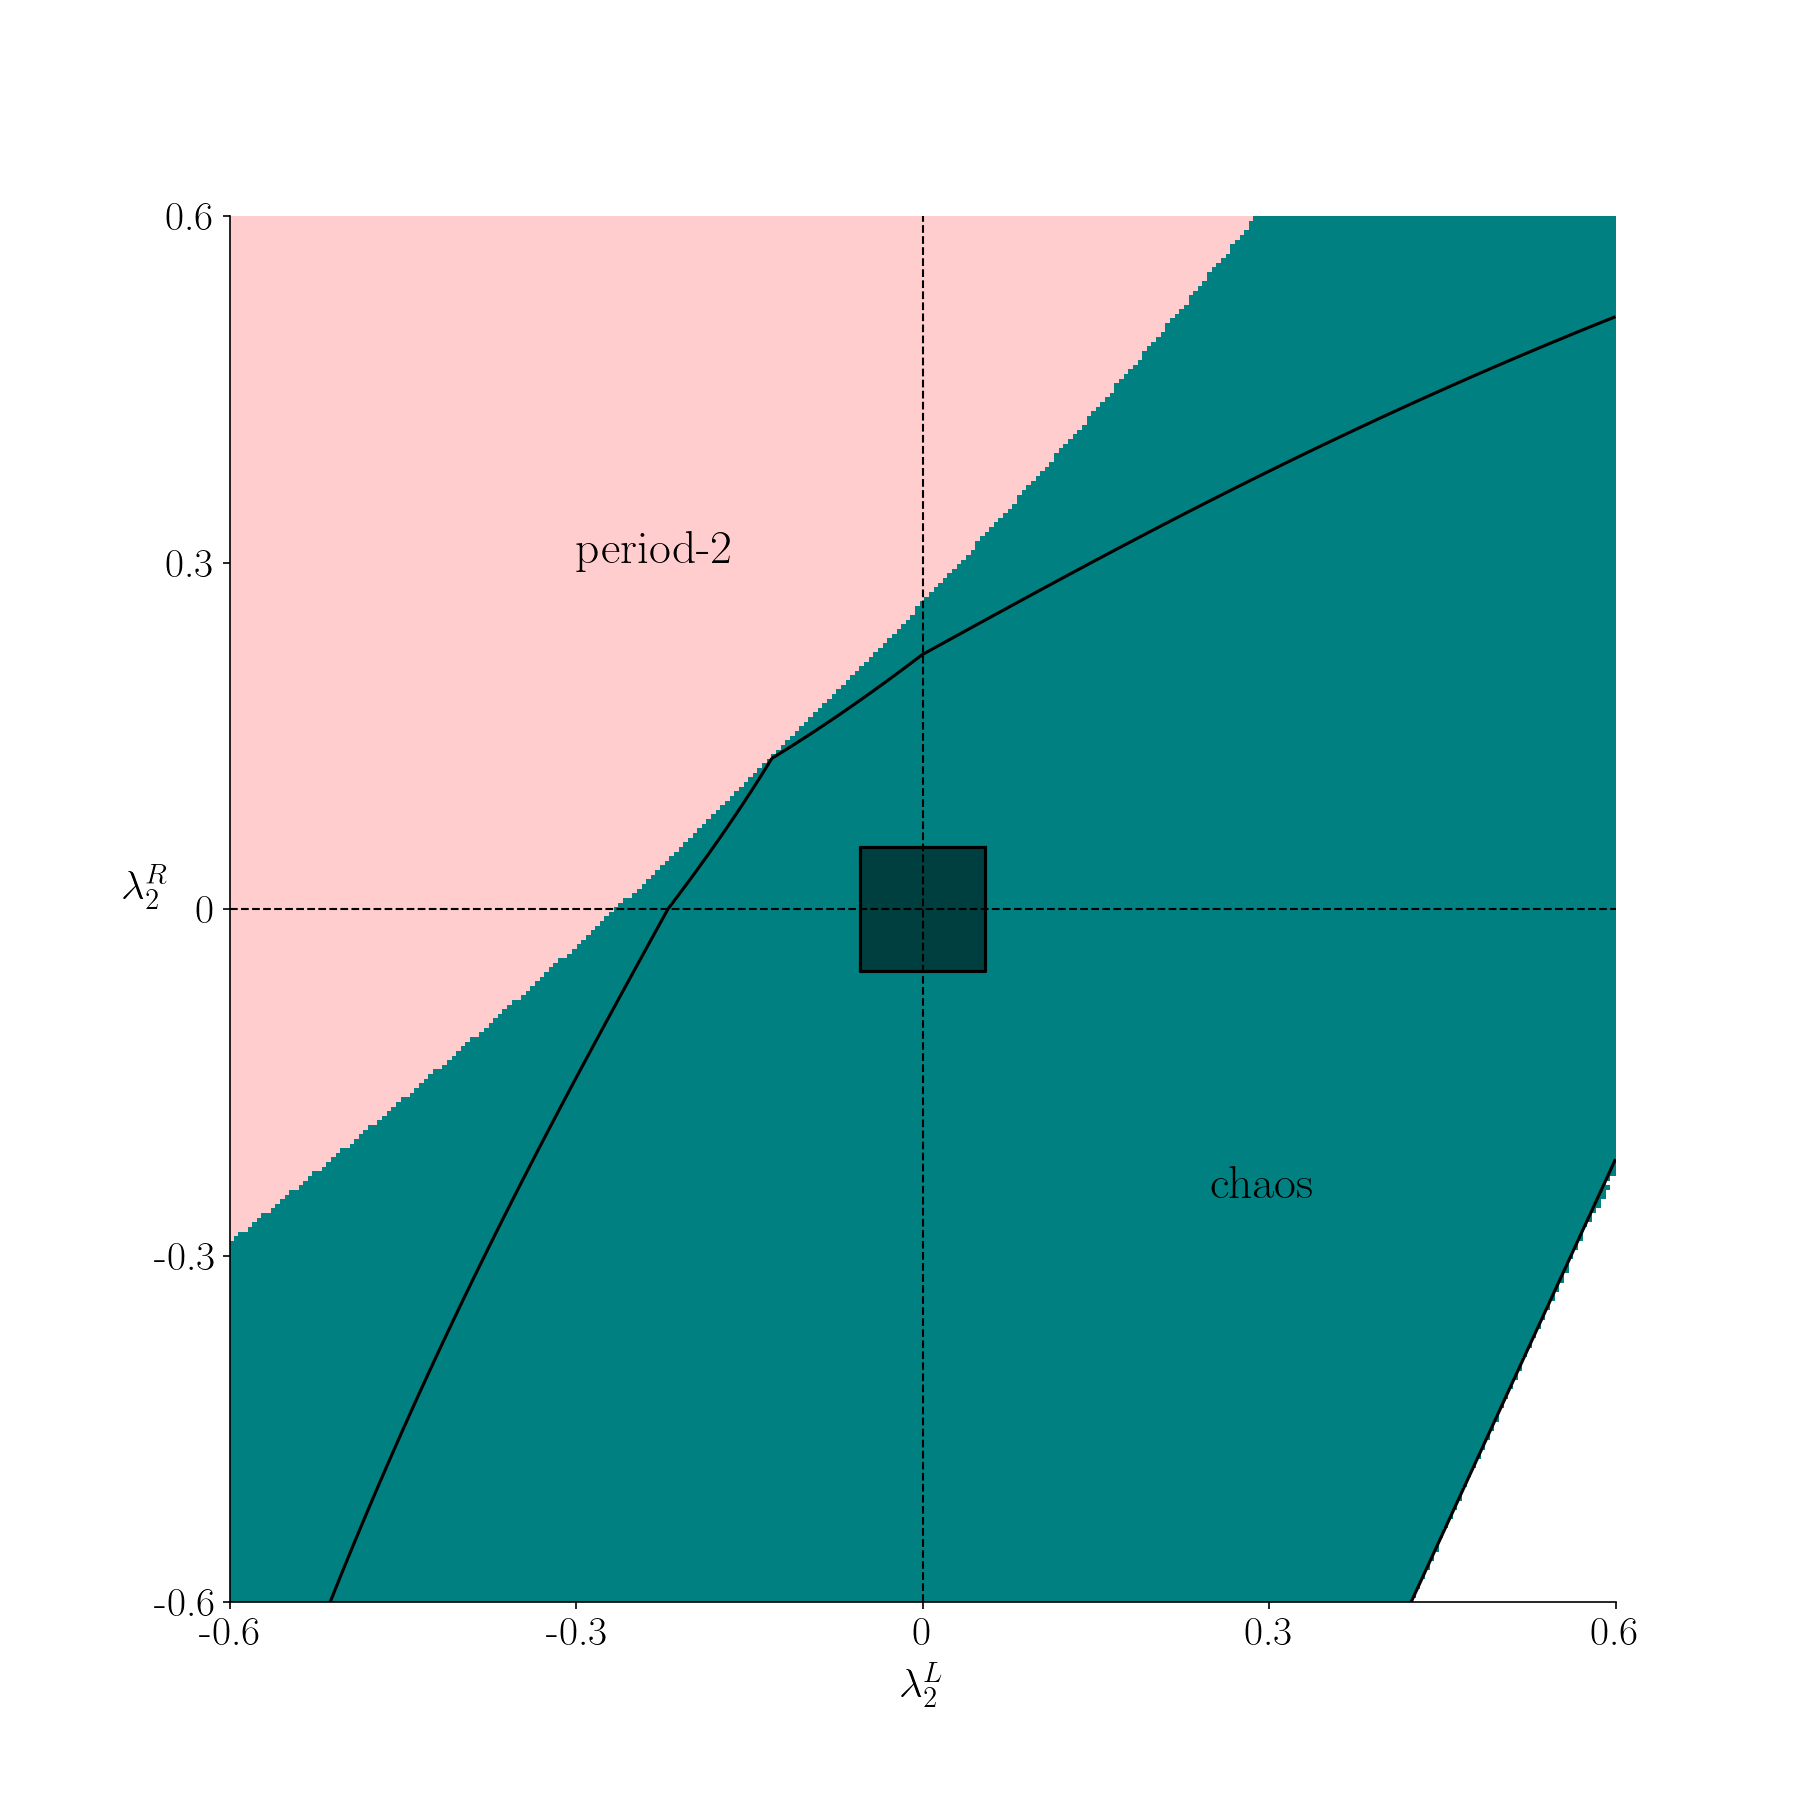

0.053846153846153835


C:\Users\ighosh\AppData\Local\Temp/ipykernel_63980/922043377.py:227: RuntimeWarning: invalid value encountered in sqrt
  a = (delta_L-delta_R-tau_L*tau_R-np.sqrt(theta1(lambda_2L, lambda_2R)))/(2*tau_R)
C:\Users\ighosh\AppData\Local\Temp/ipykernel_63980/922043377.py:255: RuntimeWarning: invalid value encountered in sqrt
  b = (delta_R-delta_L-tau_L*tau_R-np.sqrt(theta1(lambda_2L, lambda_2R)))/(2*tau_L)
C:\Users\ighosh\AppData\Local\Temp/ipykernel_63980/922043377.py:402: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(l2L, l2R, Z, cmap=cmap2)


[Text(0, -0.6, '-0.6'),
 Text(0, -0.3, '-0.3'),
 Text(0, 0.0, '0'),
 Text(0, 0.3, '0.3'),
 Text(0, 0.6, '0.6')]

In [10]:
sz=20

def check_forward_invariance_4(alpha, lambda_2L, beta, lambda_2R):
    #function to check for forward invariance
    
    tau_L=alpha+lambda_2L
    delta_L = alpha*lambda_2L
    tau_R = -beta+lambda_2R
    delta_R = -beta*lambda_2R
    
    def f(l):
        if (l[0] <= 0):
            return np.array(([tau_L, 1], [-delta_L, 0])).dot(l) + np.array([1,0])
        else:
            return np.array(([tau_R, 1], [-delta_R, 0])).dot(l) + np.array([1,0])
        
    AL = np.array(([tau_L, 1], [-delta_L, 0]))
    AR = np.array(([tau_R, 1], [-delta_R, 0]))
    dic = {'L': AL, 'R': AR}
    
    eig_L = np.linalg.eigvals(AL)
    lu = (eig_L[eig_L > 1.])[0]
    ls = (eig_L[abs(eig_L)<1.])[0]

    eig_R = np.linalg.eigvals(AR)
    ru = (eig_R[eig_R < -1.])[0]
    rs = (eig_R[abs(eig_R)<1.])[0]
    
    C1 = lu**2/((delta_R-tau_R*lu)*(lu-1))
    C2 = 0
    C = np.array([C1, C2])
    Y = np.array([-1/(tau_L-delta_L-1), delta_L/(tau_L-delta_L-1)])
    
    fC = f(C)
    
    Z1 = 1/(1-lu)
    Z2 = 0
    Z = np.array([Z1, Z2])
    fZ = f(Z)
    f2C = f(fC)
    
    Q2 = max(Y[1], Z2, fC[1])
    R2 = min(fC[1], fZ[1], f2C[1], Z2)
    Q1 = (ls - 1)/(tau_L-delta_L-1) - Q2/lu
    R1 = (ls - 1)/(tau_L-delta_L-1) - R2/lu
    
    Q=np.array([Q1, Q2])
    R=np.array([R1, R2])
    
    fQ = f(Q)
    fR = f(R)
        
    P2 = C1*Q2/(C1-Q1)
    S2 = C1*R2/(C1-R1)
    S = np.array([0, S2])
    P = np.array([0, P2])
    fS = f(S)
    fP= f(P)
    
    
    
    if R1 <=1e-8 and P[1]-C1+1 <= 1e-8:
        return [True, P, Q, R, S, fP, fQ, fR, fS, Y, C, fC, Z, f(Z), f(fC)]
    else:
        return [False, P, Q, R, S, fP, fQ, fR, fS, Y, C, fC, Z, f(Z),f(fC)]
    
cmap2 = LinearSegmentedColormap.from_list('mycmap', ['#FFFFFF','#FF0000', '#008080'])

# Analytically computed curves
def curves(alpha, beta):
    N=400
    
    l2L = np.linspace(-0.6, 0.6, N)
    l2R = np.linspace(-0.6, 0.6, N)
    plt.axvline(x=0, color='k', linestyle='--', linewidth=1)
    plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
    
       
    
    def phi1(lambda_2L, lambda_2R):
        ## phi_1
        
        tau_L=alpha+lambda_2L
        delta_L = alpha*lambda_2L
        tau_R = -beta+lambda_2R
        delta_R = -beta*lambda_2R

        return delta_R - tau_R*alpha
    
    def phi2(lambda_2L, lambda_2R):
        ## phi_2
        
        tau_L=alpha+lambda_2L
        delta_L = alpha*lambda_2L
        tau_R = -beta+lambda_2R
        delta_R = -beta*lambda_2R
        
        return delta_R*(lambda_2L+1)-alpha*(tau_R+(delta_R+tau_R)*lambda_2L)
    
    def phi3(lambda_2L, lambda_2R):
        ## phi_3
        
        tau_L=alpha+lambda_2L
        delta_L = alpha*lambda_2L
        tau_R = -beta+lambda_2R
        delta_R = -beta*lambda_2R
        
        return delta_R - (delta_R+tau_R-(tau_R+1)*alpha)*alpha
    
    def phi4(lambda_2L, lambda_2R):
        ## phi_4
        
        tau_L=alpha+lambda_2L
        delta_L = alpha*lambda_2L
        tau_R = -beta+lambda_2R
        delta_R = -beta*lambda_2R
           
        return delta_R-(tau_R+delta_L+delta_R-(1+tau_R)*alpha)*alpha
    
    def phi5(lambda_2L, lambda_2R):
        ## phi5
        
        tau_L=alpha+lambda_2L
        delta_L = alpha*lambda_2L
        tau_R = -beta+lambda_2R
        delta_R = -beta*lambda_2R
  
        return delta_R - (delta_R + tau_R - (1-beta)*alpha)*alpha
    
    def gamma1(lambda_2L, lambda_2R):
        
        tau_L=alpha+lambda_2L
        delta_L = alpha*lambda_2L
        tau_R = -beta+lambda_2R
        delta_R = -beta*lambda_2R
        
        return tau_R*delta_L +(delta_L - tau_L)*delta_R
    
    def gamma2(lambda_2L, lambda_2R):
        
        tau_L=alpha+lambda_2L
        delta_L = alpha*lambda_2L
        tau_R = -beta+lambda_2R
        delta_R = -beta*lambda_2R
        
        return delta_L*tau_R - delta_R*tau_L

    
    
    F1 = np.zeros((len(l2L), len(l2R)))
    for x in range(0, len(l2L)):
        for y in range(0, len(l2R)):
            lambda_2L = l2L[x]
            lambda_2R = l2R[y]
            
            f1 = phi1(lambda_2L, lambda_2R) #1
            F1[y][x] = f1
    
    F2 = np.zeros((len(l2L), len(l2R)))
    for x in range(0, len(l2L)):
        for y in range(0, len(l2R)):
            lambda_2L = l2L[x]
            lambda_2R = l2R[y]
            
            f2 = phi2(lambda_2L, lambda_2R) #2
            F2[y][x] = f2

    F3 = np.ones((len(l2L), len(l2R)))
    for x in range(0, len(l2L)):
        for y in range(0, len(l2R)):
            
            lambda_2L = l2L[x]
            lambda_2R = l2R[y]
            
            f3 = phi3(lambda_2L, lambda_2R) #3
            F3[y][x] = f3

    F4 = np.ones((len(l2L), len(l2R)))
    for x in range(0, len(l2L)):
        for y in range(0, len(l2R)):
            
            lambda_2L = l2L[x]
            lambda_2R = l2R[y]
            
            f4 = phi4(lambda_2L, lambda_2R) #4
            F4[y][x] = f4
    contours=plt.contour(l2L, l2R, F4, levels=[0.], colors='black')
    plt.clabel(contours, inline=0, fontsize=0)
    
    F5 = np.zeros((len(l2L), len(l2R)))
    for x in range(0, len(l2L)):
        for y in range(0, len(l2R)):
            lambda_2L = l2L[x]
            lambda_2R = l2R[y]
            
            f5 = phi5(lambda_2L, lambda_2R) #5
            F5[y][x] = f5

    
    def theta1(lambda_2L, lambda_2R):
        
        tau_L=alpha+lambda_2L
        delta_L = alpha*lambda_2L
        tau_R = -beta+lambda_2R
        delta_R = -beta*lambda_2R 
        
        return (delta_L+delta_R - tau_L*tau_R)**2 - 4*delta_L*delta_R
    
    T1 = np.ones((len(l2L), len(l2R)))
    for x in range(0, len(l2L)):
        for y in range(0, len(l2R)):
            
            lambda_2L = l2L[x]
            lambda_2R = l2R[y]
            
            t1 = theta1(lambda_2L, lambda_2R) #4
            T1[y][x] = t1
    
    def theta2(lambda_2L, lambda_2R):
        
        tau_L=alpha+lambda_2L
        delta_L = alpha*lambda_2L
        tau_R = -beta+lambda_2R
        delta_R = -beta*lambda_2R 
        
        qL = -tau_L*(1-np.sqrt(1-4*delta_L/tau_L**2))/2
        a = (delta_L-delta_R-tau_L*tau_R-np.sqrt(theta1(lambda_2L, lambda_2R)))/(2*tau_R)
        
        return tau_L**2+delta_L**2-1+2*tau_L*min(0, -delta_R/tau_R, qL, a)

    l2L1 = np.linspace(-0.13044, 0.6, N)
    l2R1 = np.linspace(0.13044, 0.6, N)
    
    T2 = np.ones((len(l2L1), len(l2R1)))
    for x in range(0, len(l2L1)):
        for y in range(0, len(l2R1)):
            
            lambda_2L = l2L1[x]
            lambda_2R = l2R1[y]
            
            t2 = theta2(lambda_2L, lambda_2R) #4
            T2[y][x] = t2
    contours=plt.contour(l2L1, l2R1, T2, levels=[0.], colors='black')
    plt.clabel(contours, inline=0, fontsize=0)
    
    
    def theta3(lambda_2L, lambda_2R):
        
        tau_L=alpha+lambda_2L
        delta_L = alpha*lambda_2L
        tau_R = -beta+lambda_2R
        delta_R = -beta*lambda_2R 
        
        qR = -tau_R*(1-np.sqrt(1-4*delta_R/tau_R**2))/2
        b = (delta_R-delta_L-tau_L*tau_R-np.sqrt(theta1(lambda_2L, lambda_2R)))/(2*tau_L)
        
        return tau_R**2+delta_R**2-1+2*tau_R*max(0, -delta_L/tau_L, qR, b)
#         return tau_L**2+delta_L**2-1+2*tau_L*a

    l2L2 = np.linspace(-0.6, -0.13044, N)
    l2R2 = np.linspace(-0.6, 0.13044, N)
    
    T3 = np.ones((len(l2L2), len(l2R2)))
    for x in range(0, len(l2L2)):
        for y in range(0, len(l2R2)):
            
            lambda_2L = l2L2[x]
            lambda_2R = l2R2[y]
            
            t3 = theta3(lambda_2L, lambda_2R) #4
            T3[y][x] = t3
    contours=plt.contour(l2L2, l2R2, T3, levels=[0.], colors='black')
    plt.clabel(contours, inline=0, fontsize=0)
    
    

Z = np.genfromtxt("ZZ_n_2.csv", delimiter=",")

alpha = 1.3
beta = 1.3

l2L = np.linspace(-0.6, 0.6, 300)
l2R = np.linspace(-0.6, 0.6, 300)

for i in range(len(l2L)):
    for j in range(len(l2R)):
        
        lambda_2L = l2L[i]
        lambda_2R = l2R[j]
        
        tau_L=alpha+lambda_2L
        dl = alpha*lambda_2L
        tau_R = -beta+lambda_2R
        dr = -beta*lambda_2R
        
        AL = np.array(([tau_L, 1], [-dl, 0]))
        AR = np.array(([tau_R, 1], [-dr, 0]))
        dic = {'L': AL, 'R': AR}
        
        word1 = 'L'*1+'R'
        Ms1 = generate_Ms(word1)
        eig_value1, eig_vector1 = np.linalg.eig(Ms1) 
        eig_vector1 = eig_vector1.T
        P1 = generate_fixed_point(word1)
        
        word2 = 'L'*2+'R'
        Ms2 = generate_Ms(word2)
        eig_value2, eig_vector2 = np.linalg.eig(Ms2) 
        eig_vector2 = eig_vector2.T
        P2 = generate_fixed_point(word2)
        
        word3 = 'L'*3+'R'
        Ms3 = generate_Ms(word3)
        eig_value3, eig_vector3 = np.linalg.eig(Ms3) 
        eig_vector3 = eig_vector3.T
        P3 = generate_fixed_point(word3)
        
        word4 = 'L'*4+'R'
        Ms4 = generate_Ms(word4)
        eig_value4, eig_vector4 = np.linalg.eig(Ms4) 
        eig_vector4 = eig_vector4.T
        P4 = generate_fixed_point(word4)
        
        word5 = 'L'*5+'R'
        Ms5 = generate_Ms(word5)
        eig_value5, eig_vector5 = np.linalg.eig(Ms5) 
        eig_vector5 = eig_vector5.T
        P5 = generate_fixed_point(word5)
        
        word6 = 'L'*6+'R'
        Ms6 = generate_Ms(word6)
        eig_value6, eig_vector6 = np.linalg.eig(Ms6) 
        eig_vector6 = eig_vector6.T
        P6 = generate_fixed_point(word6)
        
        word7 = 'L'*7+'R'
        Ms7 = generate_Ms(word7)
        eig_value7, eig_vector7 = np.linalg.eig(Ms7) 
        eig_vector7 = eig_vector7.T
        P7 = generate_fixed_point(word7)
        
        word8 = 'L'*8+'R'
        Ms8 = generate_Ms(word8)
        eig_value8, eig_vector8 = np.linalg.eig(Ms8) 
        eig_vector8 = eig_vector8.T
        P8 = generate_fixed_point(word8)
        
        word9 = 'L'*9+'R'
        Ms9 = generate_Ms(word9)
        eig_value9, eig_vector9 = np.linalg.eig(Ms9) 
        eig_vector9 = eig_vector9.T
        P9 = generate_fixed_point(word9)
        
        word10 = 'L'*10+'R'
        Ms10 = generate_Ms(word10)
        eig_value10, eig_vector10 = np.linalg.eig(Ms10) 
        eig_vector10 = eig_vector10.T
        P10 = generate_fixed_point(word10)
        
        word11 = 'LLLLRLLLLRR'
        Ms11 = generate_Ms(word11)
        eig_value11, eig_vector11 = np.linalg.eig(Ms11) 
        eig_vector11 = eig_vector11.T
        P11 = generate_fixed_point(word11)


        if (np.all((np.abs(eig_value1) < 1)) and check_admissibility(P1, word1, tau_L, dl, tau_R, dr)==True): 
            Z[j, i] = 0.1
        elif (np.all((np.abs(eig_value2) < 1)) and check_admissibility(P2, word2, tau_L, dl, tau_R, dr)==True): 
            Z[j, i] = 0.15
        elif (np.all((np.abs(eig_value3) < 1)) and check_admissibility(P3, word3, tau_L, dl, tau_R, dr)==True): 
            Z[j, i] = 0.2
        elif (np.all((np.abs(eig_value4) < 1)) and check_admissibility(P4, word4, tau_L, dl, tau_R, dr)==True): 
            Z[j, i] = 0.25
        elif (np.all((np.abs(eig_value5) < 1)) and check_admissibility(P5, word5, tau_L, dl, tau_R, dr)==True): 
            Z[j, i] = 0.3
        elif (np.all((np.abs(eig_value6) < 1)) and check_admissibility(P6, word6, tau_L, dl, tau_R, dr)==True): 
            Z[j, i] = 0.35
        elif (np.all((np.abs(eig_value7) < 1)) and check_admissibility(P7, word7, tau_L, dl, tau_R, dr)==True): 
            Z[j, i] = 0.4
        elif (np.all((np.abs(eig_value8) < 1)) and check_admissibility(P8, word8, tau_L, dl, tau_R, dr)==True): 
            Z[j, i] = 0.45
        elif (np.all((np.abs(eig_value9) < 1)) and check_admissibility(P9, word9, tau_L, dl, tau_R, dr)==True): 
            Z[j, i] = 0.5
        elif (np.all((np.abs(eig_value10) < 1)) and check_admissibility(P10, word10, tau_L, dl, tau_R, dr)==True): 
            Z[j, i] = 0.55
        elif (np.all((np.abs(eig_value11) < 1)) and check_admissibility(P11, word11, tau_L, dl, tau_R, dr)==True): 
            Z[j, i] = 0.6


%matplotlib notebook
fig = plt.figure(figsize=(8, 8))

ax=plt.subplot(111, aspect='equal')

r = min(3*(1-1/alpha)/7, 3*(1-1/beta)/7, (1/alpha+1/beta -1)/10) #computation of r
print(r)



curves(alpha, beta)
plt.pcolor(l2L, l2R, Z, cmap=cmap2)
plt.xlabel("$\\lambda_2^L$", size=sz)
plt.ylabel("$\\lambda_2^R$", size=sz, rotation=False)

# plots our region
vertices = np.array([[r, r],[r, -r], [-r, -r], [-r, r]])
patches = []
triangle = Polygon(vertices, True)
patches.append(triangle)

p = PatchCollection(patches, color='k', alpha=0.5)
ax=plt.gca()
ax.add_collection(p)

ax.plot([r, r, -r, -r, r], [r, -r, -r, r, r], 'k-')

plt.text(-0.3, 0.3, "period-$2$", size=sz+3)
plt.text(0.25, -0.25, "chaos", size=sz+3)
plt.xticks(size=13)
plt.yticks(size=13)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_yticks([-0.6, -0.3, 0, 0.3, .6])
ax.set_xticks([-0.6, -0.3, 0, 0.3, .6])

ax.set_xticklabels([i if i != 0 else 0 for i in ax.get_xticks()], size=sz)
ax.set_yticklabels([i if i != 0 else 0 for i in ax.get_yticks()], size=sz)

### Fig 6. (2D figure on $\tau_L$ and $\tau_R$ plane)

In [ ]:
delta_L = 0.05
delta_R = 0.05

p1Min = 0
p1Max = 3
p2Min = -1
p2Max = -3

NN_p1 = 300 #100
NN_p2 = NN_p1
N=2
numIter = 10**7 #10**5
nMax = 15
mu=1
tol=10**(-10)
normMax = 1e+4
nanValue = -1

TL = np.linspace(p1Min, p1Max, NN_p1)
TR = np.linspace(p2Min, p2Max, NN_p2)

X = np.zeros((NN_p1*NN_p2, N))
A_sum = np.zeros((NN_p1*NN_p2, N))
A_diff = np.zeros((NN_p1*NN_p2, N))
Z = np.zeros(NN_p1*NN_p2)

count=1
for j1 in range(1, NN_p1+1):
    for j2 in range(1, NN_p2+1):
        
        tau_L = TL[j1-1]
        tau_R = TR[j2-1]
        
        AL = np.array([[tau_L, 1], [-delta_L, 0]])
        AR = np.array([[tau_R, 1], [-delta_R, 0]])
        j = (j1-1)*NN_p2 + j2
        A_sum[j-1, :] = (AR[:, 0]+AL[:, 0]).T
        A_diff[j-1, :] = (AR[:, 0]-AL[:, 0]).T
        x_fp = np.linalg.inv(np.eye(2)-AR).dot(np.array([1, 0]))
        p2 = x_fp.T + 0.001*np.random.randn(2)
        X[j-1,:] = p2
        if delta_R <= tau_R-1:
            X[j-1,:] = np.zeros(2)
        

for p in range(1,numIter-nMax+1):
    A = np.array([X[:, 1] + np.ones(NN_p1*NN_p2), np.zeros(NN_p1*NN_p2)]).T
    B = 1/2*(A_sum+np.tile(np.sign(X[:, 0]).reshape((len(X[:, 0]), 1)), (1, 2))*A_diff)*np.tile(X[:, 0].reshape((len(X[:, 0]), 1)), (1, 2))
    X = A+B
    count+=1
print(Z) 

Z[np.isnan(X[:, 0]**2 + X[:, 1]**2)] = nanValue
Z[np.isposinf(X[:, 0]**2 + X[:, 1]**2)] = nanValue
Z[np.isneginf(X[:, 0]**2 + X[:, 1]**2)] = nanValue
Z[X[:, 0]**2+X[:, 1]**2>normMax**2] = nanValue
Z[X[:, 0]**2+X[:, 1]**2<10**-6] = nanValue
ZZ = np.reshape(Z, (NN_p1, NN_p2))
ZZ=ZZ.T+1
np.savetxt("ZZ_n_nonlinearity.csv", ZZ, delimiter=",")
ZZ

In [11]:
def check_div(tau_L, delta_L, tau_R, delta_R):

    def f(l):
        x, y = l
        s = (np.sign(x)+1)/2
        x_new = (1-s)*tau_L*x + s*tau_R*x + y+1
        y_new = -(1-s)*delta_L*x - s*delta_R*x
        return np.array([x_new, y_new])
    
    try:
        
        z = np.array([1, 0])
        v = np.array([1, 0])
        K = []
        b = np.array([1, 0])
        
        X1 = -1/(tau_R-delta_R-1)
        X2 = delta_R/(tau_R-delta_R-1)
        X = np.array([X1+0.001*np.random.randn(), X2+0.001*np.random.randn()])

        if delta_R <= tau_R-1:
            X = np.array([0, 0])

        for i in range(10**6):
            X = f(X)
            x1=X[0]
            x2=X[1]
            if abs(x1)>10**4: return False
            
            if z[0] <= 0:
                A = np.array([[tau_L, 1], [-delta_L, 0]])
            else:
                A = np.array([[tau_R, 1], [-delta_R, 0]])
            v1 = A.dot(v)
            no = np.linalg.norm(v1)
            K+=[np.log(no), ]
            v= v1/no
            z = A.dot(z) + b
            
        if sum(K)/len(K) > 0: return True
        else: return False
    except ZeroDivisionError:
        return 0
    
def generate_Ms(word):
    Ms = np.eye(2)
    for i in word:
        Ms = dic[i].dot(Ms)
    return Ms
    
def generate_Ps(word):
    Ps = np.eye(2)
    for i in range(len(word)-1):
        k = word[::-1][0:i+1]
        #print(k)
        Z = np.eye(2)
        for j in k:
            Z = Z.dot(dic[j])
        Ps += Z
    return Ps

b = np.array([1, 0])

def generate_fixed_point(word):
    Ms = generate_Ms(word)
    #print("Ms=", Ms)
    Ps = generate_Ps(word)
    f1 = Ps.dot(b)
    f = np.linalg.inv(np.eye(2) - Ms).dot(f1)
    return f

def check_admissibility(P, word, tau_L, delta_L, tau_R, delta_R):
    def fL(X):
        x = X[0]
        y = X[1]
        return np.array(([tau_L, 1], [-delta_L, 0])).dot(np.array([x, y]))+np.array([1,0])

    def fR(X):
        x = X[0]
        y = X[1]
        return np.array(([tau_R, 1], [-delta_R, 0])).dot(np.array([x, y]))+np.array([1,0])
    
    for i in word:
        if (i=='L' and P[0]<=0):
            P1 = fL(P)
        elif (i=='R' and P[0]>=0):
            P1 = fR(P)
        else:
            return False
        P = P1
    return True

def draw_pp(tau_L, delta_L, tau_R, delta_R):
    
    def f(l):
        x,y = l
        if (x <= 0):
            return np.array(([tau_L, 1], [-delta_L, 0])).dot(np.array([x, y]))+np.array([1,0])
        else:
            return np.array(([tau_R, 1], [-delta_R, 0])).dot(np.array([x, y]))+np.array([1,0])

    X1 = -1/(tau_R-delta_R-1)
    X2 = delta_R/(tau_R-delta_R-1)
    X = np.array([X1+0.001*np.random.randn(), X2+0.001*np.random.randn()])

    x = [X[0]]
    y = [X[1]]
    for i in range(10**3):
        X = f(X)
        x += [X[0], ]
        y += [X[1], ]
    plt.plot(x, y, 'ko', ms=1)
    plt.title("$\\delta_L=$"+str(delta_L)+", $\\delta_R=$"+str(delta_R))

def check_chaos_new(tau_L, delta_L, tau_R, delta_R):
    
    z = np.array([1, 0])
    v = np.array([1, 0])
    K = []
    b = np.array([1, 0])
    for i in range(10**5):
        if z[0] <= 0:
            A = np.array([[tau_L, 1], [-delta_L, 0]])
        else:
            A = np.array([[tau_R, 1], [-delta_R, 0]])
        v1 = A.dot(v)
        no = np.linalg.norm(v1)
        K+=[np.log(no), ]
        v= v1/no
        z = A.dot(z) + b
    if sum(K)/len(K) > 0: return True
    else: return False

C:\Users\ighosh\AppData\Local\Temp/ipykernel_63980/233980043.py:177: RuntimeWarning: invalid value encountered in sqrt
  alpha = (tau_L + np.sqrt(tau_L**2 - 4*delta_L))/2
C:\Users\ighosh\AppData\Local\Temp/ipykernel_63980/233980043.py:178: RuntimeWarning: invalid value encountered in sqrt
  ls = (tau_L - np.sqrt(tau_L**2 - 4*delta_L))/2


<IPython.core.display.Javascript object>


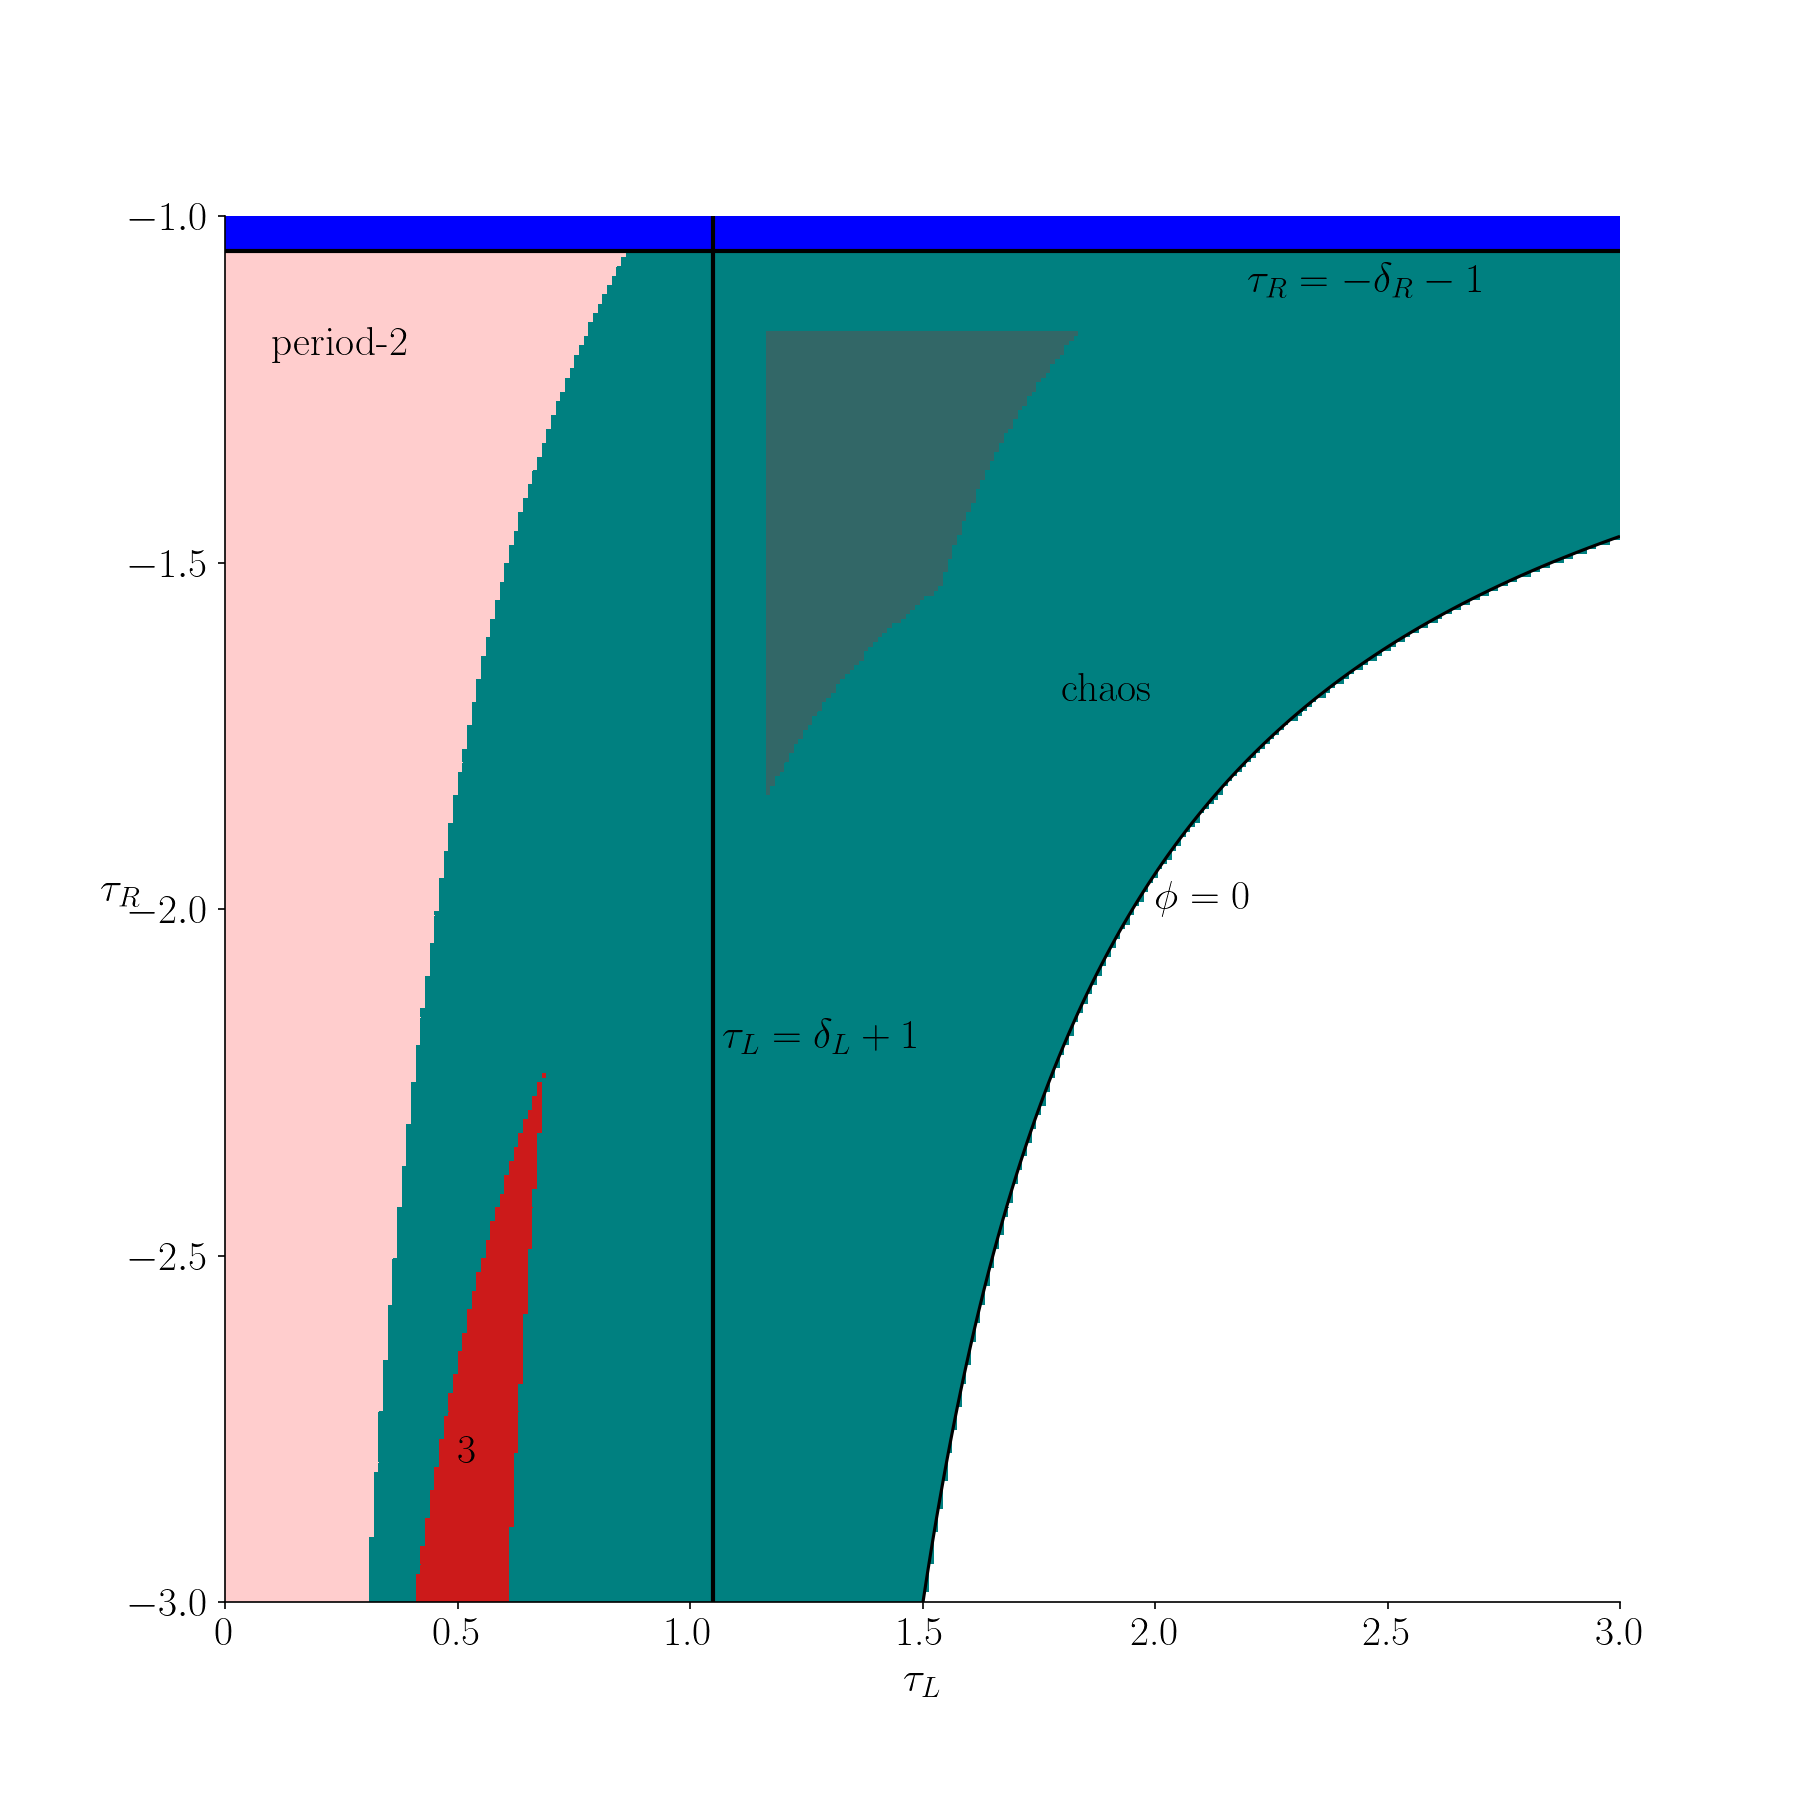

C:\Users\ighosh\AppData\Local\Temp/ipykernel_63980/233980043.py:196: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(TL, TR, Z, cmap=cmap2)


Text(1.8, -1.7, 'chaos')

In [13]:
delta_L = 0.05
delta_R = 0.05

p1Min = 0
p1Max = 3
p2Min = -1
p2Max = -3

NN_p1 = 300 #100
NN_p2 = NN_p1
N=2
numIter = 10**7 #10**5
nMax = 15
mu=1
tol=10**(-10)
normMax = 1e+4
nanValue = -1

TL = np.linspace(p1Min, p1Max, NN_p1)
TR = np.linspace(p2Min, p2Max, NN_p2)

sz=20

def check_forward_invariance_4(tau_L, delta_L, tau_R, delta_R):
    
    def f(l):
        if (l[0] <= 0):
            return np.array(([tau_L, 1], [-delta_L, 0])).dot(l) + np.array([1,0])
        else:
            return np.array(([tau_R, 1], [-delta_R, 0])).dot(l) + np.array([1,0])
        
    AL = np.array(([tau_L, 1], [-delta_L, 0]))
    AR = np.array(([tau_R, 1], [-delta_R, 0]))
    dic = {'L': AL, 'R': AR}
    
    eig_L = np.linalg.eigvals(AL)
    lu = (eig_L[eig_L > 1.])[0]
    ls = (eig_L[abs(eig_L)<1.])[0]

    eig_R = np.linalg.eigvals(AR)
    ru = (eig_R[eig_R < -1.])[0]
    rs = (eig_R[abs(eig_R)<1.])[0]

    C1 = lu**2/((delta_R-tau_R*lu)*(lu-1))
    C2 = 0
    C = np.array([C1, C2])

    Y = np.array([-1/(tau_L-delta_L-1), delta_L/(tau_L-delta_L-1)])
    
    fC = f(C)
    
    Z1 = 1/(1-lu)
    Z2 = 0
    Z = np.array([Z1, Z2])
    fZ = f(Z)
    f2C = f(fC)
    
    Q2 = max(Y[1], Z2, fC[1])
    R2 = min(fC[1], fZ[1], f2C[1], Z2)

    Q1 = (ls - 1)/(tau_L-delta_L-1) - Q2/lu
    R1 = (ls - 1)/(tau_L-delta_L-1) - R2/lu
    
    Q=np.array([Q1, Q2])
    R=np.array([R1, R2])
    
    fQ = f(Q)
    fR = f(R)
        
    P2 = C1*Q2/(C1-Q1)
    S2 = C1*R2/(C1-R1)
    S = np.array([0, S2])
    P = np.array([0, P2])
    fS = f(S)
    fP= f(P)
    
    
    
    if R1 <=1e-8 and P[1]-C1+1 <= 1e-8:
        return [True, P, Q, R, S, fP, fQ, fR, fS, Y, C, fC, Z, f(Z), f(fC)]
    else:
        return [False, P, Q, R, S, fP, fQ, fR, fS, Y, C, fC, Z, f(Z),f(fC)]
    
cmap2 = LinearSegmentedColormap.from_list('mycmap', ['#FFFFFF','#FF0000', '#008080'])
Z = np.genfromtxt("ZZ_n_nonlinearity.csv", delimiter=",")

TL = np.linspace(p1Min, p1Max, NN_p1)
TR = np.linspace(p2Min, p2Max, NN_p2)

for i in range(len(TL)):
    for j in range(len(TR)):
        
        tau_L = TL[i]
        tau_R = TR[j]
        
        AL = np.array(([tau_L, 1], [-delta_L, 0]))
        AR = np.array(([tau_R, 1], [-delta_R, 0]))
        dic = {'L': AL, 'R': AR}
        
        word1 = 'L'*1+'R'
        Ms1 = generate_Ms(word1)
        eig_value1, eig_vector1 = np.linalg.eig(Ms1) 
        eig_vector1 = eig_vector1.T
        P1 = generate_fixed_point(word1)
        
        word2 = 'L'*2+'R'
        Ms2 = generate_Ms(word2)
        eig_value2, eig_vector2 = np.linalg.eig(Ms2) 
        eig_vector2 = eig_vector2.T
        P2 = generate_fixed_point(word2)
        
        word3 = 'L'*3+'R'
        Ms3 = generate_Ms(word3)
        eig_value3, eig_vector3 = np.linalg.eig(Ms3) 
        eig_vector3 = eig_vector3.T
        P3 = generate_fixed_point(word3)
        
        word4 = 'L'*4+'R'
        Ms4 = generate_Ms(word4)
        eig_value4, eig_vector4 = np.linalg.eig(Ms4) 
        eig_vector4 = eig_vector4.T
        P4 = generate_fixed_point(word4)
        
        word5 = 'L'*5+'R'
        Ms5 = generate_Ms(word5)
        eig_value5, eig_vector5 = np.linalg.eig(Ms5) 
        eig_vector5 = eig_vector5.T
        P5 = generate_fixed_point(word5)
        
        word6 = 'L'*6+'R'
        Ms6 = generate_Ms(word6)
        eig_value6, eig_vector6 = np.linalg.eig(Ms6) 
        eig_vector6 = eig_vector6.T
        P6 = generate_fixed_point(word6)
        
        word7 = 'L'*7+'R'
        Ms7 = generate_Ms(word7)
        eig_value7, eig_vector7 = np.linalg.eig(Ms7) 
        eig_vector7 = eig_vector7.T
        P7 = generate_fixed_point(word7)
        
        word8 = 'L'*8+'R'
        Ms8 = generate_Ms(word8)
        eig_value8, eig_vector8 = np.linalg.eig(Ms8) 
        eig_vector8 = eig_vector8.T
        P8 = generate_fixed_point(word8)
        
        word9 = 'L'*9+'R'
        Ms9 = generate_Ms(word9)
        eig_value9, eig_vector9 = np.linalg.eig(Ms9) 
        eig_vector9 = eig_vector9.T
        P9 = generate_fixed_point(word9)
        
        word10 = 'L'*10+'R'
        Ms10 = generate_Ms(word10)
        eig_value10, eig_vector10 = np.linalg.eig(Ms10) 
        eig_vector10 = eig_vector10.T
        P10 = generate_fixed_point(word10)
        
        word11 = 'LLLLRLLLLRR'
        Ms11 = generate_Ms(word11)
        eig_value11, eig_vector11 = np.linalg.eig(Ms11) 
        eig_vector11 = eig_vector11.T
        P11 = generate_fixed_point(word11)

        if (np.all((np.abs(eig_value1) < 1)) and check_admissibility(P1, word1, tau_L, delta_L, tau_R, delta_R)==True): 
            Z[j, i] = 0.1
        elif (np.all((np.abs(eig_value2) < 1)) and check_admissibility(P2, word2, tau_L, delta_L, tau_R, delta_R)==True): 
            Z[j, i] = 0.6

for i in range(len(TL)):
    for j in range(len(TR)):
        
        tau_L = TL[i]
        tau_R = TR[j]
        
        alpha = (tau_L + np.sqrt(tau_L**2 - 4*delta_L))/2
        ls = (tau_L - np.sqrt(tau_L**2 - 4*delta_L))/2
        beta = -(tau_R - np.sqrt(tau_R**2 - 4*delta_R))/2
        lr = (tau_R + np.sqrt(tau_R**2 - 4*delta_R))/2

        r1 = 3*(1 - 1/alpha)/7
        r2 = 3*(1 - 1/beta)/7
        r3 = (1/alpha + 1/beta -1)/10

        r = min([r1, r2, r3])

        if np.abs(ls)<r and np.abs(lr)<r:
            Z[j, i] = 0.9


%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax=plt.subplot(111)

plt.pcolor(TL, TR, Z, cmap=cmap2)
plt.xlabel("$\\tau_L$", size=sz)
plt.ylabel("$\\tau_R$", size=sz, rotation=False)

boundary_value = -delta_R - 1

import matplotlib.patches as patches
polygon_vertices2 = [(min(TL), boundary_value), (max(TL), boundary_value), (max(TL), max(TR)), (min(TL), max(TR))]
polygon = patches.Polygon(polygon_vertices2, closed=True, color='blue')
plt.gca().add_patch(polygon)

plt.axhline(y = -delta_R -1, color='black', lw = 2)
plt.axvline(x = delta_L +1, color='black', lw = 2)

# homoclinic corner

def phi1(tau_L, tau_R):

        def f(l):
            if (l[0] <= 0):
                return np.array(([tau_L, 1], [-delta_L, 0])).dot(l) + np.array([1,0])
            else:
                return np.array(([tau_R, 1], [-delta_R, 0])).dot(l) + np.array([1,0])

        AL = np.array(([tau_L, 1], [-delta_L, 0]))
        AR = np.array(([tau_R, 1], [-delta_R, 0]))
        dic = {'L': AL, 'R': AR}

        eig_L = np.linalg.eigvals(AL)
        lu = (eig_L[eig_L > 1.])[0]
        ls = (eig_L[abs(eig_L)<1.])[0]

        eig_R = np.linalg.eigvals(AR)
        ru = (eig_R[eig_R < -1.])[0]
        rs = (eig_R[abs(eig_R)<1.])[0]

        
        return delta_R-(tau_R+delta_L+delta_R-(1+tau_R)*lu)*lu

TL1 = np.linspace(1.5, 3, NN_p1)
TR1 = np.linspace(-1.1, -3, NN_p2)
    
F1 = np.ones((len(TL1), len(TR1)))
for x in range(0, len(TL1)):
    for y in range(0, len(TR1)):
        t_L = TL1[x]
        t_R = TR1[y]
        f1 = phi1(t_L, t_R)
        F1[y][x] = f1
contours=plt.contour(TL1, TR1, F1, levels=[0.], colors='black')
plt.clabel(contours, inline=0, fontsize=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
ax.set_yticks([-3, -2.5, -2, -1.5, -1])

ax.set_xticklabels([i if i != 0 else 0 for i in ax.get_xticks()], size=sz)

ax.tick_params(axis='both', labelsize=sz)

plt.text(1.07, -2.2, "$\\tau_L = \delta_L+1$", size=sz)
plt.text(2.2, -1.11, "$\\tau_R = -\delta_R-1$", size=sz)
plt.text(0.1, -1.2, "period-$2$", size=sz)
plt.text(0.5, -2.8, "$3$", size=sz)
plt.text(2, -2, "$\\phi = 0$", size=sz)
plt.text(1.8, -1.7, "chaos", size=sz)

### Fig. 7

<IPython.core.display.Javascript object>


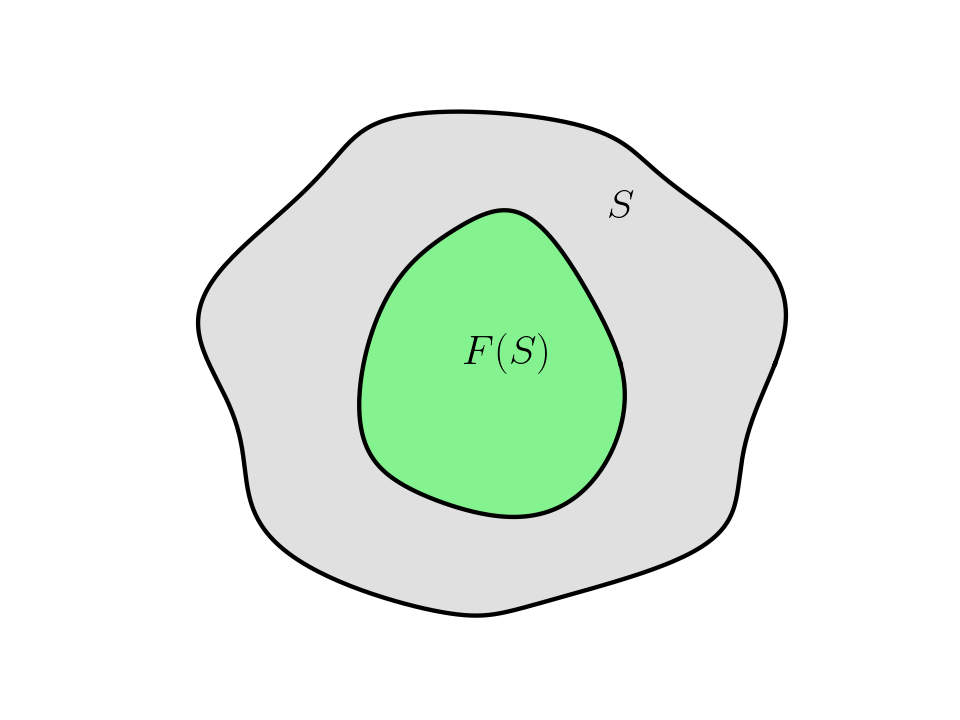

(-1.1079621423384065,
 1.1079298034289464,
 -0.9499123187068128,
 0.9499123187068127)

In [30]:
figHeight = 3.6
figWidth = figHeight*4/3
hh = figHeight*4/3

th = np.linspace(0, 2 * np.pi, 400)

xx = 0.97 * np.cos(th) + 0.06 * np.sin(6 * th)
yy = 0.86 * np.sin(th) + 0.02 * np.sin(4 * th)

fig, ax = plt.subplots()

# Fill the area
ax.fill(xx, yy, color='#E0E0E0', edgecolor='none')

ax.plot(xx, yy, 'k-', linewidth=10 / hh)

xx = 0.44 * np.cos(th) - 0.06 * np.sin(2 * th)
yy = 0.52 * np.sin(th) - 0.02 * np.sin(4 * th)

ax.fill(xx, yy, color='#83f28f', edgecolor='none')


# Plot the boundary
ax.plot(xx, yy, 'k-', linewidth=10 / hh)

plt.text(0.4, 0.5, "$S$", size=sz)
plt.text(-0.1, 0, "$F(S)$", size=sz)
ax.set_aspect('equal')
plt.axis('off')


### Fig. 8

<IPython.core.display.Javascript object>


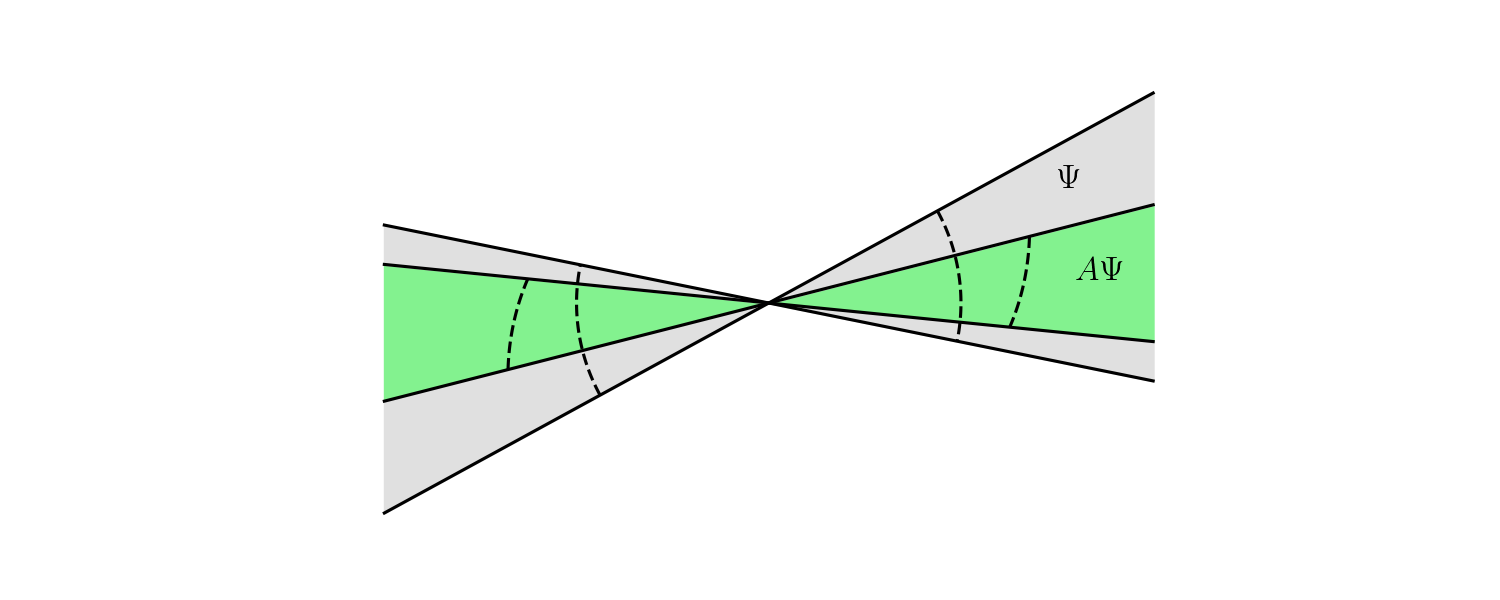

In [31]:
%matplotlib notebook
sz=16
xMin= -2
xMax=2
fig = plt.figure(figsize=(10, 4))

xx = np.array([xMin, xMax])
th3 = .25
th4 = -.1
plt.plot(xx, np.tan(th3)*xx, 'k-')
plt.plot(xx, np.tan(th4)*xx, 'k-')

th1 = 0.5
th2 = -.2

plt.plot(xx, np.tan(th1)*xx, 'k-')
plt.plot(xx, np.tan(th2)*xx, 'k-')



th = np.linspace(th3, th4, 100)
rr = 1.3 +.4*th
plt.plot(rr*np.cos(th), rr*np.sin(th), 'k--')
plt.plot(-rr*np.cos(th), -rr*np.sin(th), 'k--')

th = np.linspace(th1,th2,100)
plt.plot(np.cos(th),np.sin(th),'k--')
plt.plot(-np.cos(th),-np.sin(th),'k--')

vertices = np.array([[xMin,xMin*np.tan(th3)],[0, 0], [xMin,xMin*np.tan(th4)]])
patches = []
triangle = Polygon(vertices, True)
patches.append(triangle)

p = PatchCollection(patches, color='#83f28f')
ax=plt.gca()
ax.add_collection(p)

vertices = np.array([[xMax,xMax*np.tan(th3)],[0, 0], [xMax,xMax*np.tan(th4)]])
patches = []
triangle = Polygon(vertices, True)
patches.append(triangle)

p = PatchCollection(patches, color='#83f28f')
ax=plt.gca()
ax.add_collection(p)

vertices = np.array([[xMin,xMin*np.tan(th4)],[0, 0], [xMin,xMin*np.tan(th2)]])
patches = []
triangle = Polygon(vertices, True)
patches.append(triangle)

p = PatchCollection(patches, color='#E0E0E0')
ax=plt.gca()
ax.add_collection(p)

vertices = np.array([[xMax,xMax*np.tan(th4)],[0, 0], [xMax,xMax*np.tan(th2)]])
patches = []
triangle = Polygon(vertices, True)
patches.append(triangle)

p = PatchCollection(patches, color='#E0E0E0')
ax=plt.gca()
ax.add_collection(p)

vertices = np.array([[xMin,xMin*np.tan(th3)],[0, 0], [xMin,xMin*np.tan(th1)]])
patches = []
triangle = Polygon(vertices, True)
patches.append(triangle)

p = PatchCollection(patches, color='#E0E0E0')
ax=plt.gca()
ax.add_collection(p)

vertices = np.array([[xMax,xMax*np.tan(th3)],[0, 0], [xMax,xMax*np.tan(th1)]])
patches = []
triangle = Polygon(vertices, True)
patches.append(triangle)

p = PatchCollection(patches, color='#E0E0E0')
ax=plt.gca()
ax.add_collection(p)

plt.text(1.5, 0.6, '$\\Psi$', size=sz)
plt.text(1.6, 0.12, '$A \\Psi$', size=sz)
plt.axis('off')

ax = plt.subplot(111)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
width = xmax-xmin+0.01
height=ymax-ymin+0.01


ax.set_aspect('equal')


### Fig. 9

In [32]:
def find_intersection(line_p1, line_p2, square_vertices):
    line_p1 = np.array(line_p1)
    line_p2 = np.array(line_p2)
    square_vertices = np.array(square_vertices)
   

    line_dir = line_p2 - line_p1


    v0, v1, v2, v3 = square_vertices
    u = v1 - v0
    v = v3 - v0
    normal = np.cross(u, v)


    denom = np.dot(normal, line_dir)
    if np.abs(denom) < 1e-6:
        return None  # The line is parallel to the plane

    d = np.dot(normal, v0)
    t = (d - np.dot(normal, line_p1)) / denom
    if t < 0:
        return None  # Intersection is behind the starting point of the line

    intersection_point = line_p1 + t * line_dir
   
    def is_point_in_square(point, v0, u, v):
        vec0 = point - v0
        dot00 = np.dot(u, u)
        dot01 = np.dot(u, v)
        dot02 = np.dot(u, vec0)
        dot11 = np.dot(v, v)
        dot12 = np.dot(v, vec0)
        invDenom = 1 / (dot00 * dot11 - dot01 * dot01)
        u_param = (dot11 * dot02 - dot01 * dot12) * invDenom
        v_param = (dot00 * dot12 - dot01 * dot02) * invDenom
        return (u_param >= 0) and (v_param >= 0) and (u_param + v_param <= 1)
    
    return intersection_point


line_p1 = [-1.5, -0.0004, -0.0004]
line_p2 = [1.4, 0, 0]


square_vertices = [
    [0, -0.0006, -0.0006],
    [0., 0.0004, -0.0006],
    [0, 0.0004, 0.001],
    [0, -0.0006, 0.001]
]

intersection = find_intersection(line_p1, line_p2, square_vertices)
print("Intersection:", intersection)


Intersection: [ 0.        -0.0001931 -0.0001931]


<IPython.core.display.Javascript object>


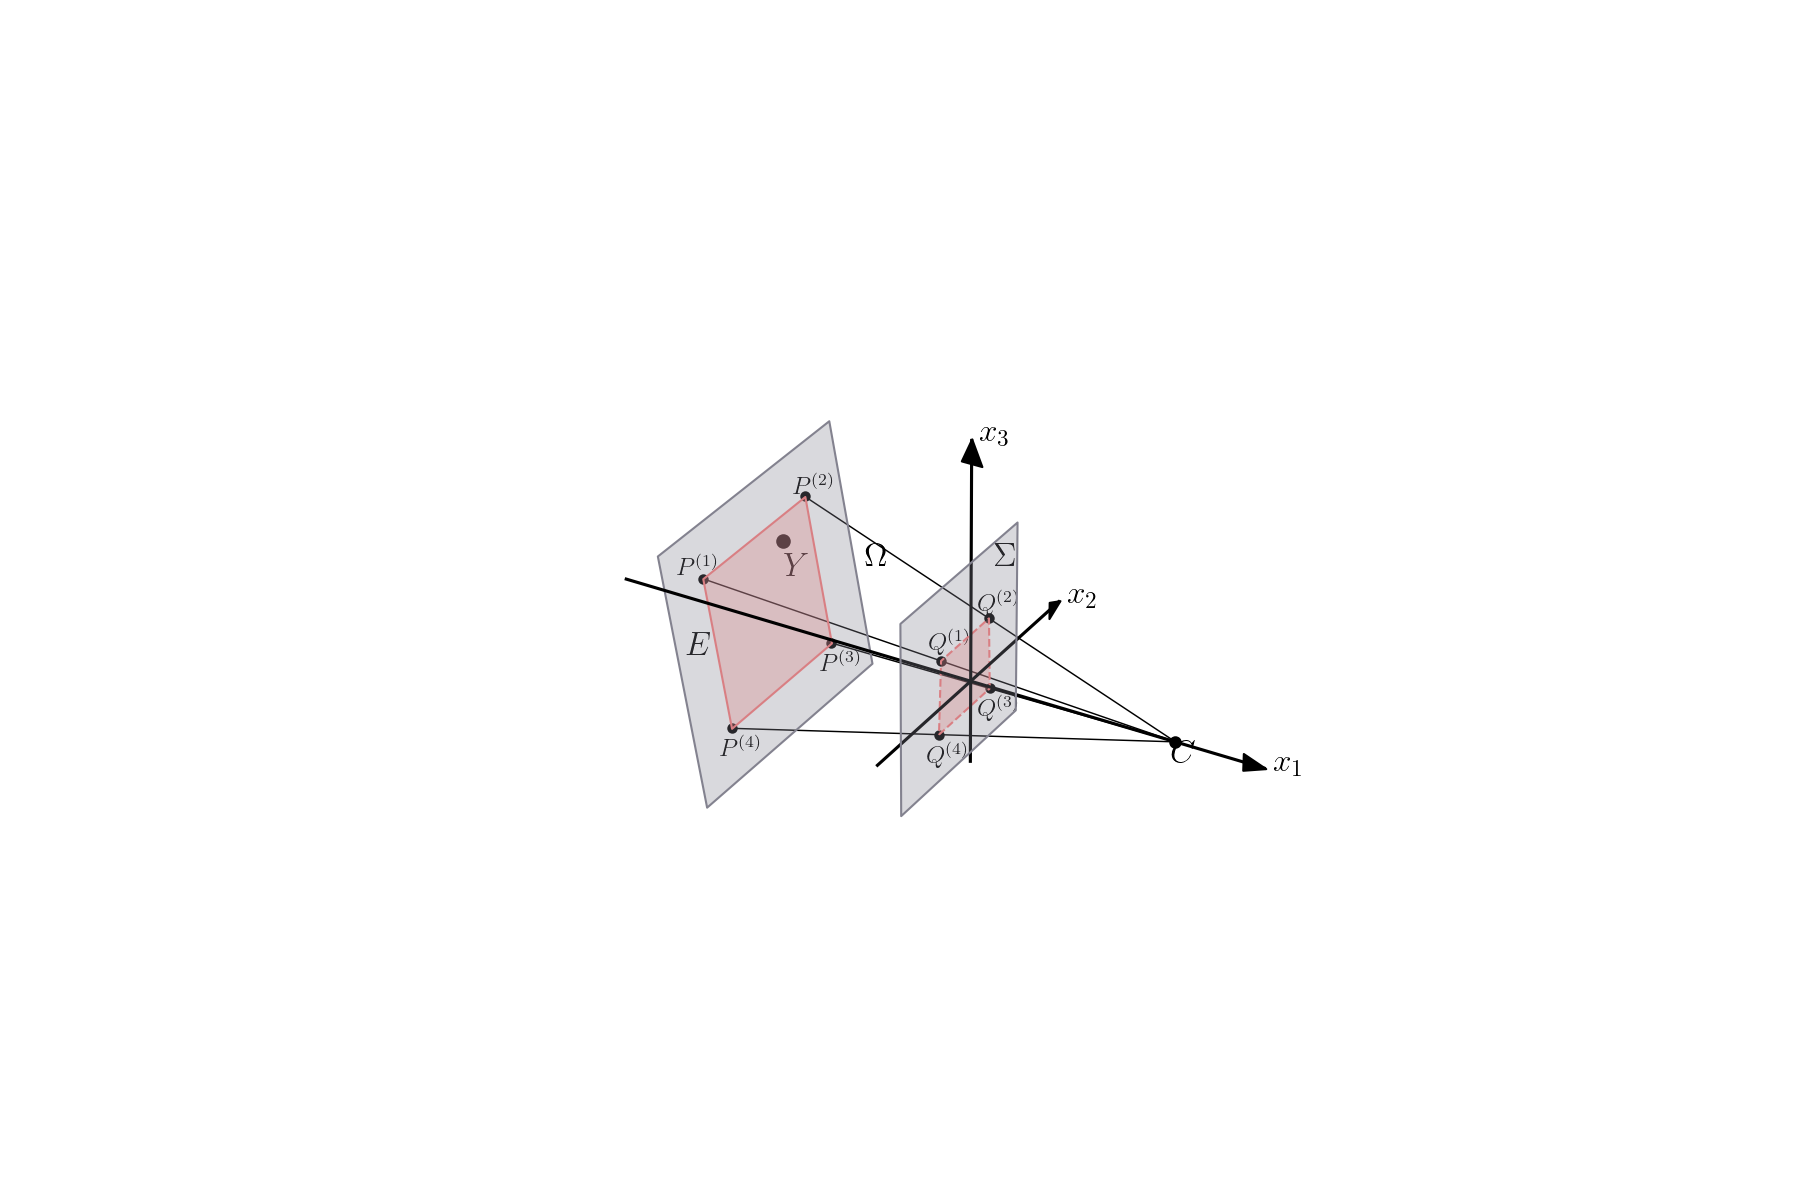

v1= [-2.22044605e-16 -2.73684211e-04 -2.10526316e-04]
v2= [-2.22044605e-16  1.68421053e-04 -2.10526316e-04]
v3= [2.22044605e-16 1.57746479e-04 3.94366197e-04]
v4= [ 2.22044605e-16 -2.56338028e-04  3.94366197e-04]


(-2.5, 2.0, -0.0008, 0.0008)

In [33]:
%matplotlib notebook
sz=16
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

def draw_arrow(ax, start, end, color, label):
    ax.quiver(start[0], start[1], start[2],
              end[0]-start[0], end[1]-start[1], end[2]-start[2],
              color=color, arrow_length_ratio=0.)

    ax.text(end[0]+0.05, end[1], end[2], label, color=color, size=sz)

ax.set_xlim([-2.5, 2])
ax.set_ylim([-0.0008, 0.0008])
ax.set_zlim([-0.0007, 0.002])

# Draw the arrows for each axis
draw_arrow(ax, [-2.5, 0, 0], [2, 0, 0], 'k', '$x_1$')
draw_arrow(ax, [0, -0.0008, 0], [0, 0.0008, 0], 'k', '$x_2$')
draw_arrow(ax, [0, 0, -0.0007], [0, 0, 0.002], 'k', '$x_3$')

verts=np.array([[0, -0.0006, -0.0006],[0., 0.0004, -0.0006], [0, 0.0004, 0.001], [0, -0.0006, 0.001]])

faces = [[verts[0], verts[1], verts[2], verts[3]]]
ax.add_collection3d(Poly3DCollection(faces, color='#83828f', alpha = 0.3))

verts=np.array([[-1.2, -0.0008, -0.0008],[-1.2, 0.0006, -0.0008], [-1.5, 0.0006, 0.0012], [-1.5, -0.0008, 0.0012]])

faces = [[verts[0], verts[1], verts[2], verts[3]]]
ax.add_collection3d(Poly3DCollection(faces, color='#83828f', alpha = 0.3))


CC = np.mean(verts, axis=0)

# Define the scaling factor for the smaller square
scale_factor = 0.6  # Adjust this factor for the size of the smaller square

# Calculate the vertices of the smaller square
verts_small = np.array([
    (scale_factor * (verts[i] - CC)) + CC for i in range(4)
])

faces = [[verts_small[0], verts_small[1], verts_small[2], verts_small[3]]]
ax.add_collection3d(Poly3DCollection(faces, color='#FF7F7F', alpha = 0.3))


plt.plot([verts_small[0][0], 1.4], [verts_small[0][1], 0], [verts_small[0][2], 0], 'ko-', lw=0.7, ms=4)
plt.plot([verts_small[1][0], 1.4], [verts_small[1][1], 0], [verts_small[1][2], 0], 'ko-', lw=0.7, ms=4)
plt.plot([verts_small[2][0], 1.4], [verts_small[2][1], 0], [verts_small[2][2], 0], 'ko-', lw=0.7, ms=4)
plt.plot([verts_small[3][0], 1.4], [verts_small[3][1], 0], [verts_small[3][2], 0], 'ko-', lw=0.7, ms=4)


# arrows
verts=np.array([[2, 0, 0], [1.85, 0, 0.00007],[1.85, 0, -0.00007]]) #x1
faces = [[verts[0], verts[1], verts[2]]]
ax.add_collection3d(Poly3DCollection(faces, color='k'))

verts=np.array([[0, 0.0008, 0], [0, 0.0007, 0.00007],[0, 0.0007, -0.00007]]) #x2
faces = [[verts[0], verts[1], verts[2]]]
ax.add_collection3d(Poly3DCollection(faces, color='k'))

verts=np.array([[0, 0, 0.002], [-0.07, 0, 0.0018],[0.07, 0., 0.0018]]) #x3
faces = [[verts[0], verts[1], verts[2]]]
ax.add_collection3d(Poly3DCollection(faces, color='k'))

plt.plot([1.4], [0], [0], 'ko', ms=5)

#intersections:

# int1
line_p1 = [verts_small[0][0], verts_small[0][1], verts_small[0][2]]
line_p2 = [1.4, 0, 0]
square_vertices = [
    [0, -0.0006, -0.0006],
    [0., 0.0004, -0.0006],
    [0, 0.0004, 0.001],
    [0, -0.0006, 0.001]
]

int_v1 = find_intersection(line_p1, line_p2, square_vertices)

# int2
line_p1 = [verts_small[1][0], verts_small[1][1], verts_small[1][2]]
line_p2 = [1.4, 0, 0]
square_vertices = [
    [0, -0.0006, -0.0006],
    [0., 0.0004, -0.0006],
    [0, 0.0004, 0.001],
    [0, -0.0006, 0.001]
]

int_v2 = find_intersection(line_p1, line_p2, square_vertices)

# int3
line_p1 = [verts_small[2][0], verts_small[2][1], verts_small[2][2]]
line_p2 = [1.4, 0, 0]
square_vertices = [
    [0, -0.0006, -0.0006],
    [0., 0.0004, -0.0006],
    [0, 0.0004, 0.001],
    [0, -0.0006, 0.001]
]

int_v3 = find_intersection(line_p1, line_p2, square_vertices)

# int4
line_p1 = [verts_small[3][0], verts_small[3][1], verts_small[3][2]]
line_p2 = [1.4, 0, 0]
square_vertices = [
    [0, -0.0006, -0.0006],
    [0., 0.0004, -0.0006],
    [0, 0.0004, 0.001],
    [0, -0.0006, 0.001]
]

int_v4 = find_intersection(line_p1, line_p2, square_vertices)

print("v1=", int_v1)
print("v2=", int_v2)
print("v3=", int_v3)
print("v4=", int_v4)

plt.plot([int_v1[0]], [int_v1[1]], [int_v1[2]], 'ko', ms=4)
plt.plot([int_v2[0]], [int_v2[1]], [int_v2[2]], 'ko', ms=4)
plt.plot([int_v3[0]], [int_v3[1]], [int_v3[2]], 'ko', ms=4)
plt.plot([int_v4[0]], [int_v4[1]], [int_v4[2]], 'ko', ms=4)


verts=np.array([[int_v1[0], int_v1[1], int_v1[2]],[int_v2[0], int_v2[1], int_v2[2]], [int_v3[0], int_v3[1], int_v3[2]], [int_v4[0], int_v4[1], int_v4[2]]])

faces = [[verts[0], verts[1], verts[2], verts[3]]]
ax.add_collection3d(Poly3DCollection(faces, color='#FF7F7F', alpha = 0.3, ls='--'))

ax.text(-0.0001, 0.0002, 0.0008, '$\\Sigma$', fontsize=sz)
ax.text(-2.05, -1e-5, -0.0005, '$E$', fontsize=sz)

ax.text(verts_small[0][0], verts_small[0][1]-0.0001, verts_small[0][2]-0.00015, '$P^{(4)}$', size=12)
ax.text(verts_small[1][0], verts_small[1][1]-0.0001, verts_small[1][2]-0.00016, '$P^{(3)}$', size=12)
ax.text(verts_small[2][0], verts_small[2][1]-0.0001, verts_small[2][2]+0.0001, '$P^{(2)}$', size=12)
ax.text(verts_small[3][0], verts_small[3][1]-0.0002, verts_small[3][2]+0.0002, '$P^{(1)}$', size=12)

ax.text(int_v1[0], int_v1[1]-0.0001, int_v1[2]-0.00015, '$Q^{(4)}$', size=12)
ax.text(int_v2[0], int_v2[1]-0.0001, int_v2[2]-0.00015, '$Q^{(3)}$', size=12)
ax.text(int_v3[0], int_v3[1]-0.0001, int_v3[2]+0.00015, '$Q^{(2)}$', size=12)
ax.text(int_v4[0], int_v4[1]-0.0001, int_v4[2]+0.00018, '$Q^{(1)}$', size=12)


ax.set_box_aspect([1,0.5,.5])

plt.plot([-1.5], [0.0002], [0.0005], 'ko')
ax.text(-1.5, 0.0002, 0.0002, '$Y$', size=sz)
ax.text(-1.5, 0.0009, -0.0003, '$\\Omega$', size=sz)
ax.text(1.94, -0.0008, 0.00075, '$C$', size=sz)

plt.axis('off')

### Fig 10. (a)

<IPython.core.display.Javascript object>


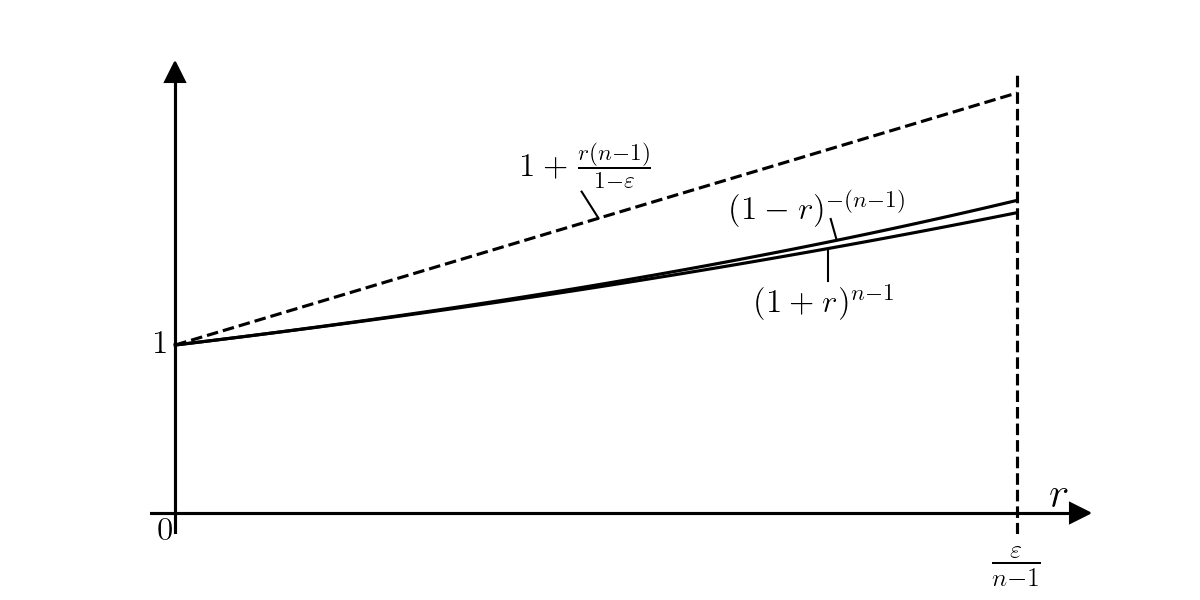

In [34]:
sz=16
epsilon = 0.6
n = 10
N = 100

R = np.linspace(0, epsilon/(n-1), N)
F1 = np.zeros(N)
F2 = np.zeros(N)
F3 = np.zeros(N)

for i in range(N):
    r = R[i]
    F1[i] = (1+r)**(n-1)
    F2[i] = 1+r*(n-1)/(1-epsilon)
    F3[i] = (1-r)**(1-n)
    
%matplotlib notebook
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(111)

plt.plot(R, F1, 'k-')
plt.plot(R, F2, 'k--')
plt.plot(R, F3, 'k-')
# plt.plot(R, F4, 'k--')

plt.xlim(-0.002, epsilon/(n-1)+0.005)

plt.axis('off')

ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
ax.axhline(y=0, color='k', linestyle='-')
ax.axvline(x=0, color='k', linestyle='-')

ax.axvline(x=epsilon/(n-1), color='k', linestyle='--')

plt.text(0.0693, 0.034, '$r$', size=21)
plt.text(epsilon/(n-1)-0.002, -0.36, '$\\frac{\\varepsilon}{n - 1}$', size=sz+2)
plt.text(0.046, 1.2, '$(1+r)^{n-1}$', size=sz)
plt.text(0.044, 1.75, '$(1-r)^{-(n-1)}$', size=sz)
plt.text(0.0275, 2, '$1+\\frac{r(n-1)}{1-\\varepsilon}$', size=sz)
plt.text(-0.0014, -0.16, '$0$', size=sz)
plt.text(-0.0016, 0.95, '$1$', size=sz)

plt.plot([0.033524, 0.03219], [1.7549, 1.913], 'k-', lw=1)
plt.plot([0.05239, 0.05192], [1.625, 1.75], 'k-', lw=1)
plt.plot([0.05168, 0.05168], [1.574, 1.378], 'k-', lw=1)


### FIg. 10 (b)

<IPython.core.display.Javascript object>


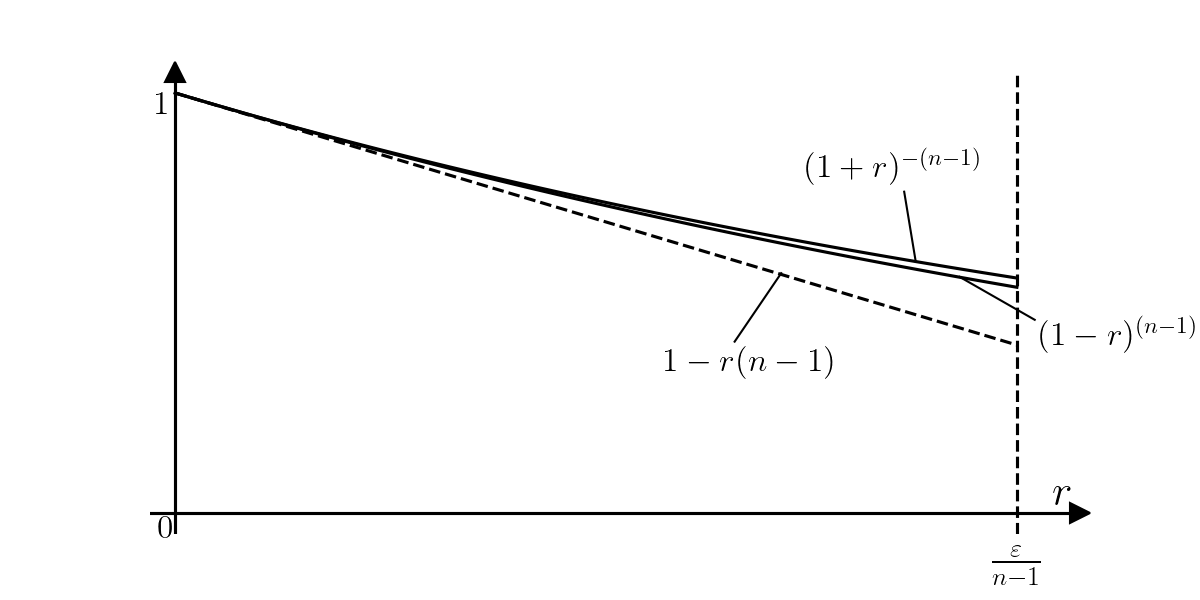

In [35]:
sz=16
epsilon = 0.6
n = 10
N = 100

R = np.linspace(0, epsilon/(n-1), N)
F1 = np.zeros(N)
F2 = np.zeros(N)
F3 = np.zeros(N)

for i in range(N):
    r = R[i]
    F1[i] = (1+r)**(1-n)
    F2[i] = 1-r*(n-1)
    F3[i] = (1-r)**(n-1)
    
%matplotlib notebook
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(111)

plt.plot(R, F1, 'k-')
plt.plot(R, F2, 'k--')
plt.plot(R, F3, 'k-')

plt.xlim(-0.002, epsilon/(n-1)+0.005)

plt.axis('off')

ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
ax.axhline(y=0, color='k', linestyle='-')
ax.axvline(x=0, color='k', linestyle='-')

ax.axvline(x=epsilon/(n-1), color='k', linestyle='--')

plt.text(0.0695, 0.02, '$r$', size=21)
plt.text(epsilon/(n-1)-0.002, -0.14, '$\\frac{\\varepsilon}{n - 1}$', size=sz+2)
plt.text(0.05, 0.8, '$(1+r)^{-(n-1)}$', size=sz)
plt.text(0.0685, 0.4, '$(1-r)^{(n-1)}$', size=sz)
plt.text(0.0388, 0.34, '$1-r(n-1)$',size=sz)
plt.text(-0.0014, -0.06, '$0$', size=sz)
plt.text(-0.0015, 0.95, '$1$', size=sz)

plt.plot([0.05865, 0.05774], [0.5994, 0.765], 'k-', lw=1)
plt.plot([0.06213, 0.06808], [0.5622, 0.46], 'k-', lw=1)
plt.plot([0.048, 0.04431], [0.571, 0.408], 'k-', lw=1)

    

### Fig. 11

<IPython.core.display.Javascript object>


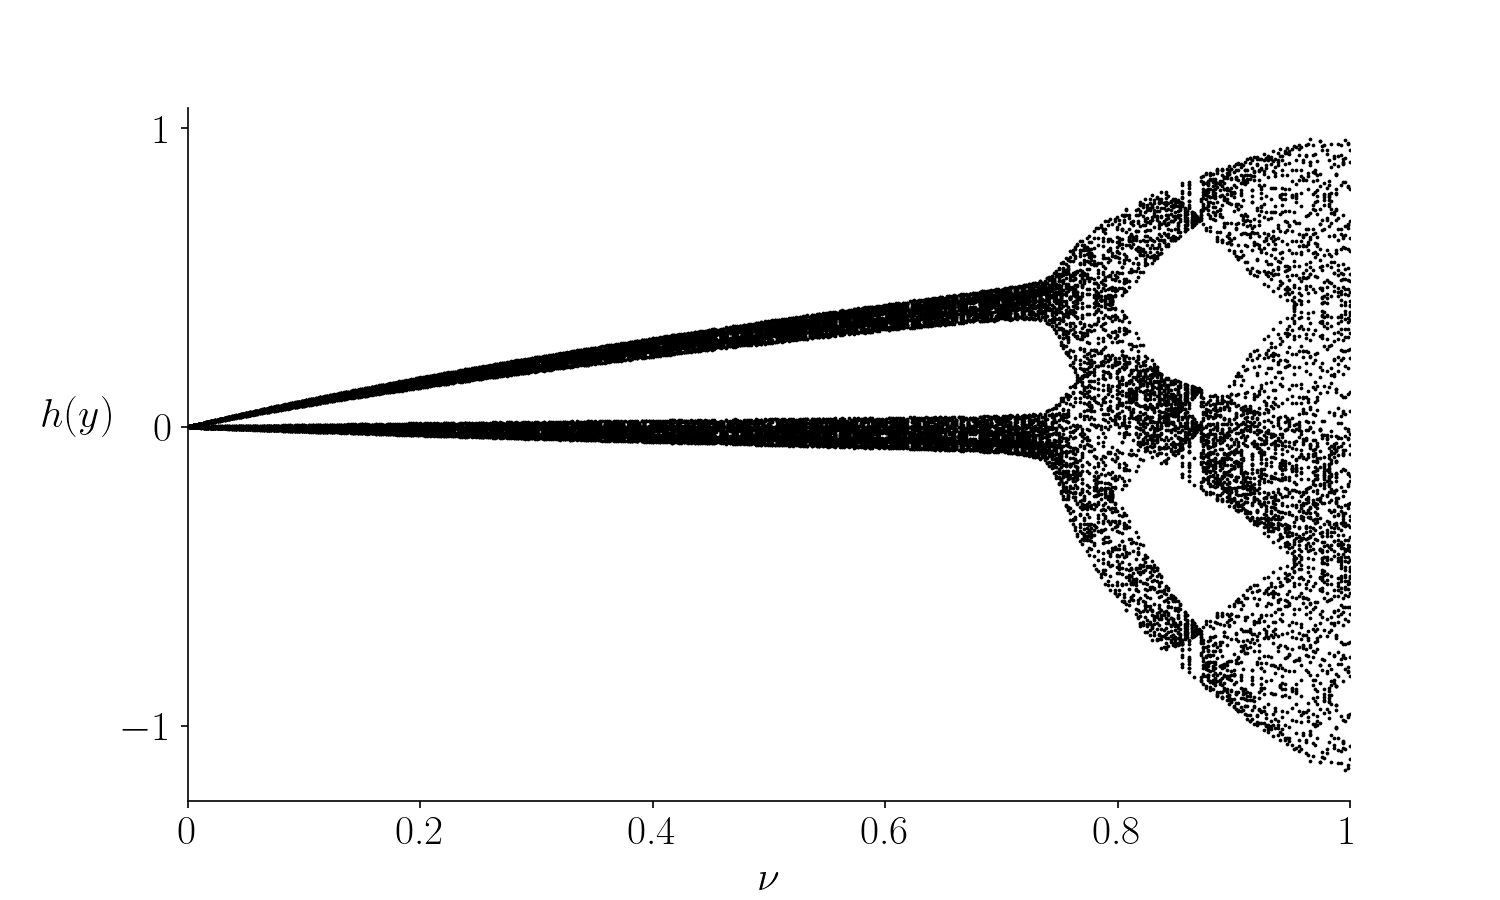

C:\Users\ighosh\AppData\Local\Temp/ipykernel_63980/1586088950.py:4: RuntimeWarning: overflow encountered in double_scalars
  return [0.03*y3, 0.03*y1- y2**2+nu, -1.2*np.abs(y1+y2+y3)]


(0.0, 1.0)

In [42]:
sz=20
def bif(nu):
    def h(y1, y2, y3, nu):
        return [0.03*y3, 0.03*y1- y2**2+nu, -1.2*np.abs(y1+y2+y3)]

    y1 = 0.00004
    y2 = 0.003
    y3 = -0.0001

    Y = [y1+y2+y3]
    for i in range(1000):
        y1, y2, y3 = h(y1, y2, y3, nu)
        Y+=[y1+y2+y3, ]

    return Y[950:]

%matplotlib notebook
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

ax.spines[['right', 'top']].set_visible(False)
NU = np.linspace(0, 1, 500)
count = 1
for nu in NU:
    Y = bif(nu)
    ax.plot([nu]*len(Y), Y, 'ko', ms=.8, rasterized=True)
    count+=1
    
plt.xticks(fontsize=sz)
plt.yticks(fontsize=sz)
plt.xlabel("$\\nu$",size=sz)
plt.text(-0.125, 0.001, '$h(y)$', size=sz)
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticks([-1, 0, 1])

ax.set_xticklabels([i if i not in [0, 1] else str(int(i)) for i in ax.get_xticks()], size=sz)
plt.xlim(0, 1)